In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
from astropy.io import ascii
import lightkurve as lk

# rf-2 train set tois

In [2]:
# more toi work in "Compile Final stats" nb

##load all data

##old
#these from https://tev.mit.edu/data/collection/193/ dl'd may 25, 2021
atlas_summary = pd.read_csv('data/csv-file-toi-catalog.csv',skiprows=4) #not bls stats
toi_list = pd.read_csv('data/csv-file-toi-catalog.csv',skiprows=4)
##new
#from same website dl'ed july 7, 2021
toi_list2 = pd.read_csv('data/csv-file-toi-catalog-2.csv',skiprows=4)
#rf2 train set/master
rf2_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf2_training.csv')
allstats = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/master_df.csv')#includes ncvz google df & tois in rf2
rf1_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf1_training.csv')



merged = pd.merge(atlas_summary,toi_list2, on='TIC')
merged2= pd.merge(atlas_summary,rf2_final, on='TIC')
merged3 = pd.merge(allstats,atlas_summary, on='TIC')
#note: that old toi list had only 4 columns, new toi list has full info (inc bls output values)

#note: my may file is less targets than the new file

/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2,99) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#print lengths for diff categories
print(len(atlas_summary),len(toi_list),len(toi_list2),len(rf2_final))
print('merged:',len(merged['TIC'].unique()), len(merged2),len(merged3))
print('unique stars:',len(atlas_summary['TIC'].unique()),
      len(toi_list2['TIC'].unique()), len(toi_list['TIC'].unique()),
     len(merged['TIC'].unique()))

2686 2686 4198 3308
merged: 2573 1231 839
unique stars: 2573 4081 2573 2573


In [4]:
merged4 = pd.merge(merged3, rf2_final, on='TIC')
merged5 = pd.merge(allstats, toi_list2, on ='TIC')
print(len(merged3['TIC'].unique()),len(merged4['TIC'].unique()),len(merged4))
print(len(merged5),len(merged5['TIC'].unique()))
#so july list only added 3 new targets corresponding to 6 light curves (sectors)


266 266 10285
845 269


In [5]:
toi_list2

,Source Pipeline,Stellar Catalog,TIC,Full TOI ID,Signal ID,TOI Disposition,EXOFOP Disposition,TIC Right Ascension,TIC Declination,TMag Value,...,Orbital Period Value,Orbital Period Error,Transit Duration Value,Transit Duration Error,Transit Depth Value,Transit Depth Error,Sectors,Public Comment,Alerted,Edited
0,qlp,gaia-dr2,209459275,559.01,1,PC,CP,46.818732,-31.162695,10.5700,...,6.983907,0.000006,5.076000,0.065000,10050.000000,0.292261,4 31,possible tropical Jupiter; third of four trans...,2019-04-04 21:13:03+0000,2021-06-29 20:31:24+0000
1,qlp,tic8,373453507,2475.01,1,PC,FP,76.524210,10.594236,10.7300,...,15.792563,0.000140,2.823000,0.472000,1190.000000,3.384090,5 32,NaN,2021-02-03 23:44:47+0000,2021-06-29 20:31:53+0000
2,qlp,gaia-dr2,410528770,1502.01,1,PC,FP,328.215739,60.569105,10.4820,...,2.753470,0.000250,3.463000,0.227000,2880.000000,647.897000,16 17,V-shaped and some odd-even,2019-12-05 21:41:09+0000,2021-06-29 20:31:13+0000
3,qlp,gaia-dr2,241040309,1559.01,1,PC,PC,20.717373,48.955391,10.3980,...,3.464790,0.000430,1.009000,0.311000,1150.000000,8.354720,17 18,Rs = 2.5 RSun - large planet,2019-12-19 20:58:20+0000,2021-06-29 20:31:14+0000
4,spoc,tic8.1,458342769,2638.01,1,PC,PC,159.842639,-55.491820,11.1671,...,3.931304,0.000613,0.852965,0.714607,1970.960011,354.650900,36,Gaia DR2 plx=1.3736; no stellar radius; host s...,2021-04-29 22:53:08+0000,2021-06-29 20:31:57+0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193,qlp,tic8,100589632,2342.01,1,PC,FP,86.459009,-32.947778,11.1580,...,3.947157,0.000011,1.699000,0.203000,1880.000000,2.612180,5 6 32 33,Crowded field; refer to 100589633/TOI 2726 as ...,2020-10-23 19:58:27+0000,2021-06-29 21:44:02+0000
4194,qlp,tic8,100589633,2726.01,1,PC,PC,86.453963,-32.947532,13.4030,...,3.947151,0.000010,1.993000,0.522000,16080.000000,158.015000,5 6 32 33,found in faint-star QLP search; correct host s...,2021-06-03 22:07:19+0000,2021-06-29 21:45:21+0000
4195,spoc,NaN,320004517,1055.01,1,PC,CP,293.285757,-54.532360,8.0650,...,17.471139,0.001692,4.319798,0.186523,1258.553171,52.181797,13,Potential level one candidate; two transits ma...,2019-08-16 20:20:47+0000,2021-06-29 20:31:38+0000
4196,qlp,NaN,130924120,757.01,1,PC,PC,187.994616,-35.554898,9.0030,...,17.468079,0.000110,3.380000,0.363000,780.000000,0.958733,10 37,L1 candidate; some variability in LC,2019-06-11 20:03:40+0000,2021-06-29 22:05:14+0000


# TCE catalog 
#### includes EBs, pulsators,planets,etc;; TOIs are only exoplanets

In [6]:
# open tce catalogs

#from https://archive.stsci.edu/tess/bulk_downloads/bulk_downloads_tce.html
sec14tce = pd.read_csv('data/TCE_catalogs/tess2019199201929-s0014-s0014_dvr-tcestats.csv',skiprows=6)
sec15tce = pd.read_csv('data/TCE_catalogs/tess2019227203528-s0015-s0015_dvr-tcestats.csv',skiprows=6)
secs_1_13_tce = pd.read_csv('data/TCE_catalogs/tess2018206190142-s0001-s0013_dvr-tcestats.csv',skiprows=6)
secs_14_26_tce = pd.read_csv('data/TCE_catalogs/tess2019199201929-s0014-s0026_dvr-tcestats.csv',skiprows=6)
print('full:',len(sec14tce),len(sec15tce),len(secs_1_13_tce),
      len(secs_14_26_tce))
print('uniques:',len(sec14tce['ticid'].unique()),
      len(sec15tce['ticid'].unique()), len(secs_1_13_tce['ticid'].unique()),
     len(secs_14_26_tce['ticid'].unique()))
sec14tce.iloc[0:4]


full: 1441 1285 5940 6001
uniques: 952 870 3226 3043


,tceid,ticid,tce_plnt_num,sectors,lastUpdate,tce_period,tce_period_err,tce_time0bt,tce_time0bt_err,tce_time0,...,tce_dicco_mdec,tce_dicco_mdec_err,tce_dicco_msky,tce_dicco_msky_err,tce_ditco_mra,tce_ditco_mra_err,tce_ditco_mdec,tce_ditco_mdec_err,tce_ditco_msky,tce_ditco_msky_err
0,00007849727-01,7849727,1,s0014,2021-05-13,0.496663,NaN,1683.67,NaN,2458683.67,...,-0.123089,2.500008,0.123832,2.500008,0.991574,2.500002,0.477212,2.500005,1.100432,2.500003
1,00010337969-01,10337969,1,s0014,2021-05-13,13.947500,NaN,1685.45,NaN,2458685.45,...,-12.581400,3.516698,13.225990,3.523987,4.972126,3.592627,-0.976268,3.516692,5.067064,3.589837
2,00011119600-01,11119600,1,s0014,2021-05-13,0.610637,NaN,1683.73,NaN,2458683.73,...,9.274678,2.500005,9.332745,2.500005,-0.605321,2.500003,-0.373749,2.500005,0.711408,2.500003
3,00012456725-01,12456725,1,s0014,2021-05-13,17.123000,NaN,1686.81,NaN,2458686.81,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000


In [7]:
merged6= pd.merge(allstats, sec14tce, left_on='TIC',right_on='ticid')
print(len(merged6),len(merged6['TIC'].unique()),'vs. old->',len(merged3['TIC'].unique()) )

1663 459 vs. old-> 266


In [8]:
#were any of my by eye transits already in tce?--check sec 14 tces

merged7 = pd.merge(rf2_final, sec14tce, left_on='TIC',right_on='ticid')
print(len(merged7),len(merged7['TIC'].unique()))
#so im only missing 6 tce's from my by eye (could be SCVZ tho or Sec15)
#no to above b/c compared unique targets to total light curves = not fair
#of the 459 targets i only have 59 in my sample

453 59


In [9]:
merged8 = pd.merge(rf2_final, sec15tce, left_on='TIC',right_on='ticid')
print(len(merged8),len(merged8['TIC'].unique()))

451 65


In [10]:
len(rf2_final['TIC'].unique()),len(rf2_final)

(577, 3308)

In [11]:
tce1415 = pd.concat([sec14tce,sec15tce])
# print(len(sec14tce),len(sec15tce),len(tce1415)) #1441 1285 2726
# tce1415
merged9 = pd.merge(rf2_final, tce1415, left_on='TIC',right_on='ticid')
print(len(merged9),len(tce1415['ticid'].unique()),
      len(merged9['TIC'].unique()))
#idk = only 92 of the 577 were in tce

904 1395 92


In [12]:
merged10 = pd.merge(toi_list2,tce1415, left_on='TIC',right_on='ticid')
print(len(merged10),len(merged10['TIC'].unique()),
     len(toi_list2['TIC'].unique()),len(tce1415['ticid'].unique()))
# idk = so of 105 stars that were tce in secs 14/15, 92 of those became tois

181 105 4081 1395


In [13]:
merged11 = pd.merge(rf2_final, tce1415,left_on='TIC',right_on='ticid')
print(len(rf2_final['TIC'].unique()), len(tce1415['ticid'].unique()),
     len(merged11['TIC'].unique()))
# 92 out of my 577 train stars were tce in 1415

577 1395 92


In [14]:
merged12 = pd.merge(rf2_final,toi_list, on='TIC')
print(len(toi_list['TIC'].unique()), len(merged12['TIC'].unique()))
# 266 of my 577 train stars are tois from all secs
# so where do the 311 rest come from?


2573 266


In [15]:
# train stars not in toi list:
adf = rf2_final[(np.isin( rf2_final['TIC'],merged12['TIC']))==False]
len(adf['TIC'].unique())

311

In [16]:
merged13 = pd.merge(adf, tce1415,left_on='TIC',right_on='ticid')
len(merged13['TIC'].unique())
#so 16 of the missing 311 are tce in secs 1415

16

In [17]:
# train stars not in toi or sec1415 tce lists
bdf = adf[(np.isin(adf['TIC'],merged13['TIC']))==False]
print(len(bdf['TIC'].unique()))

295


In [18]:
merged14 = pd.merge(bdf, secs_1_13_tce,left_on='TIC',right_on='ticid' )
print(len(merged14['TIC'].unique()))
# so 66 of the 295 stars are tces in southern hemisphere

66


In [19]:
#train stars not in toi or sec 1415 tce or southern tce lists
cdf = bdf[(np.isin(bdf['TIC'],merged14['TIC']))==False]
print(len(cdf['TIC'].unique()))

229


In [20]:
merged15 = pd.merge(bdf, secs_14_26_tce,left_on='TIC',right_on='ticid' )
print(len(merged15['TIC'].unique()))
# only 23 of 229 stars are tces in north still


23


In [21]:
#train stars not in toi or sec 1415 tce or southern or nothern tce lists
ddf = cdf[(np.isin(cdf['TIC'],merged15['TIC']))==False]
print(len(ddf['TIC'].unique()))

206


In [22]:
ddf #duh!! these wont be tce's b/c they are the NO transit examples
ddf[ddf['CLASS']!=1.0] #1=no transit, 3= yes transit

,Unnamed: 0,TIC,CLASS,Sector,rvar,ls-1,ls-2,ls-3,lsamp-1,lsamp-2,...,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,ID


In [23]:
# targets that are in tce or tois
edf = rf2_final[(np.isin(rf2_final['TIC'], ddf['TIC']))==False]
len(edf['TIC'].unique()),577-371 #should be 206

(371, 206)

In [24]:
#see if any tce/toi classified as no transit
fdf = edf[edf['CLASS']==1.0] #possibly wrong class?? checking below
print(len(edf['TIC'].unique()), len(fdf['TIC'].unique()))
#so 82 of the 371 tce/toi stars were classified no transit
# check if they are tce only (b/c then could be a false positive)
fdf

371 82


,Unnamed: 0,TIC,CLASS,Sector,rvar,ls-1,ls-2,ls-3,lsamp-1,lsamp-2,...,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,ID
15,15,47579336,1.0,14,0.046732,3.861644,4.926661,3.165193,0.947106,0.133068,...,1.306957,0.973042,278.483674,51.717737,0.034393,0.031876,1,0,203224434,NaN
16,16,47579336,1.0,15,0.042172,3.861644,3.125634,5.051040,0.973770,0.222572,...,1.306957,0.973042,278.483674,51.717737,0.034393,0.031876,1,0,203224434,NaN
17,17,47579336,1.0,14,0.046732,3.861644,4.926661,3.165193,0.947106,0.133068,...,1.306957,0.973042,278.483674,51.717737,0.034393,0.031876,1,0,203224434,NaN
18,18,47579336,1.0,15,0.042172,3.861644,3.125634,5.051040,0.973770,0.222572,...,1.306957,0.973042,278.483674,51.717737,0.034393,0.031876,1,0,203224434,NaN
20,20,102928809,1.0,14,0.019837,0.793276,0.760701,0.828078,0.978761,0.072698,...,0.596687,0.740537,131.961058,66.210217,0.016003,0.025558,1,0,135382866,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,2452,441806298,1.0,23,0.008926,2.801735,2.410215,3.345124,0.547996,0.189716,...,0.918430,0.778874,265.847277,76.955029,0.027670,0.025412,1,0,175201765,NaN
2453,2453,441806298,1.0,24,0.017430,5.650146,2.833478,4.386577,0.714093,0.112637,...,0.918430,0.778874,265.847277,76.955029,0.027670,0.025412,1,0,175201765,NaN
2454,2454,441806298,1.0,25,0.014998,5.747534,8.848802,4.348441,0.748078,0.170346,...,0.918430,0.778874,265.847277,76.955029,0.027670,0.025412,1,0,175201765,NaN
2455,2455,441806298,1.0,26,0.009926,5.494965,26.290415,7.751705,0.591035,0.116906,...,0.918430,0.778874,265.847277,76.955029,0.027670,0.025412,1,0,175201765,NaN


In [25]:
#see which class=1 targets were actually in toi or tce lists

alltce = pd.concat([secs_1_13_tce, secs_14_26_tce])
merged16 = pd.merge(fdf, toi_list,on='TIC') #planets classified as no transit
merged17 = pd.merge(fdf,alltce, left_on='TIC',right_on='ticid' )
merged18 = pd.merge(fdf, toi_list2,on='TIC')
print(len(merged16['TIC'].unique()), len(merged17['TIC'].unique()),
      len(merged18['TIC'].unique()))
print(len(fdf['TIC'].unique()))
# 5 are tois wrongly classed as no transit
# 77 are tces classed as no transit but these could be false pos.
# no unknown detections

5 77 5
82


In [26]:
#removing duplicates

another = merged16.drop(columns=['Unnamed: 0'])
missedtois = another.drop_duplicates()
another2 = merged17.drop(columns=['Unnamed: 0'])
missedtces = another2.drop_duplicates()

print('TOIs:',len(missedtois),len(missedtois['TIC'].unique()))
print('TCEs:',len(missedtces),len(missedtces['TIC'].unique()))

TOIs: 70 5
TCEs: 1148 77


# missed TOIs

Plot 0: 198384408 14
Plot 1: 202426247 14
Plot 2: 230075227 14
Plot 3: 198212955 14
Plot 4: 219852882 14


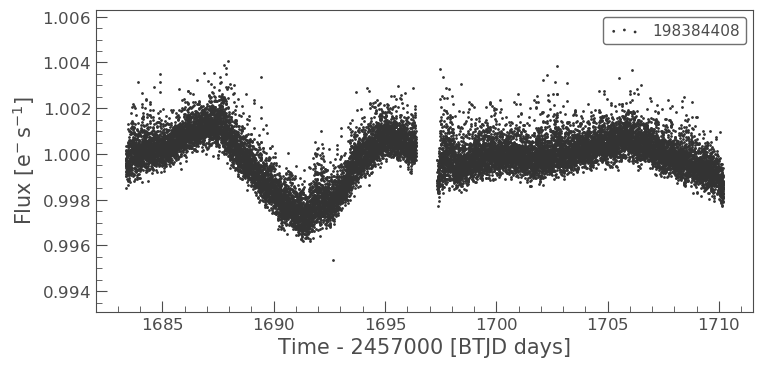

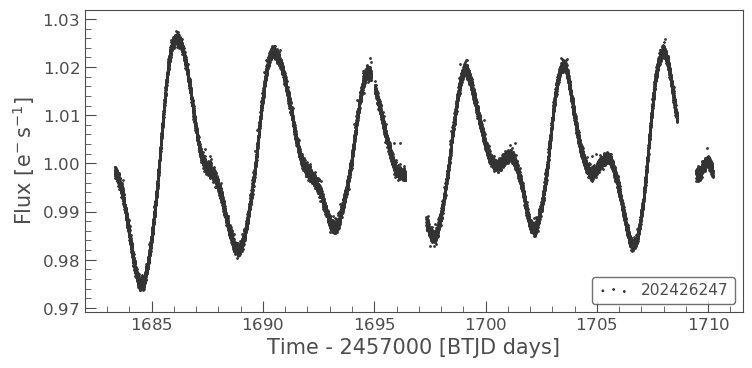

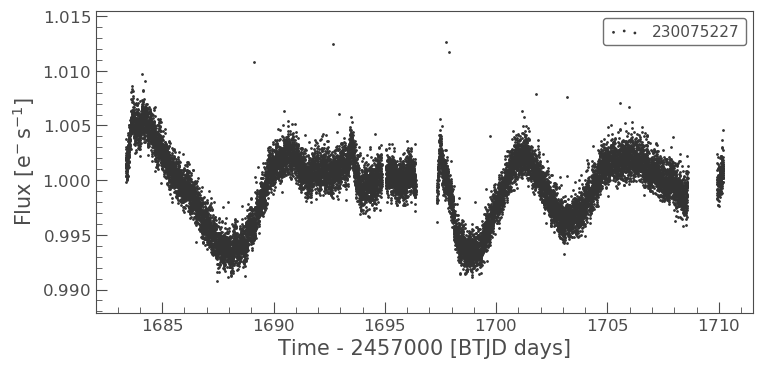

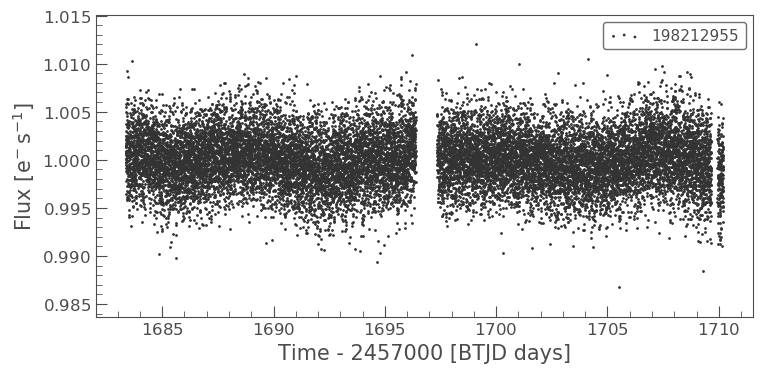

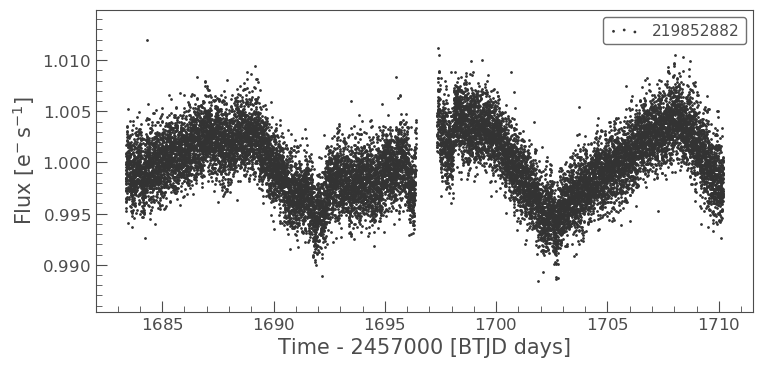

In [27]:
#data paths
secpath = '/Volumes/Seagate-stars/Final_Run/Clean_LCs_forBLS/{}/sec{}_lc.fits'#.format(tic,sec)
stitchpath = '/Volumes/Seagate-stars/Final_Run/Clean_LCs_forBLS/{}/stitched_lc.fits'#.format(tic)

count=0 
seen = {}
for tic,sec in missedtois[['TIC','Sector']].to_numpy():
    if tic not in seen:
        try:
            thepath = secpath.format(tic,sec)
            lcf = lk.open(thepath)
            lc = lcf.FLUX
            lc.scatter()
            print('Plot {}:'.format(count),tic,sec)
            count+=1
            seen[tic] = 1
        except FileNotFoundError:
            pass
    else:
        pass
    if count == 19:#to avoid too many plots
        break



In [28]:
#print toi stats for those "misclassified" tois (said no transit)
toi_list[np.isin(toi_list['TIC'],missedtois['TIC'].unique())==True]

,TIC,Orbital Period Value,Orbital Period Error,Epoch Value,Full TOI ID,Group Disposition,Public Comment
233,198384408,9.123810,0.005304,1823.255936,1689.01,PC,Potentially on the neighboring star; possibly ...
282,219852882,1.762256,0.000009,1684.537138,1346.02,PC,Candidate interior to TOI 1346.01 (5.5d). chec...
419,202426247,1.066211,0.000031,1683.604225,1860.01,PC,2 other stars in pixel; possible EB
1665,198212955,0.381481,0.000004,1683.710283,1242.01,PC,Possible L1 candidate; very short period
1789,219852882,5.502538,0.000044,1687.724121,1346.01,PC,multi; potential level 1 candidate
2055,230075227,6.115577,0.000064,1684.686895,2077.01,PC,check neighbor


# missed TCEs

Plot 0: 47579336 14
Plot 1: 219777482 14
Plot 2: 219790149 14
Plot 3: 272785770 14
Plot 4: 199573123 14
Plot 5: 230073281 14
Plot 6: 230075227 14
Plot 7: 160602230 15
Plot 8: 230077015 14
Plot 9: 230079674 14
Plot 10: 230081977 14
Plot 11: 230083417 14
Plot 12: 230088977 14
Plot 13: 198212955 14
Plot 14: 198238736 14
Plot 15: 199664165 14
Plot 16: 289581571 14
Plot 17: 199682037 14
Plot 18: 229675969 14


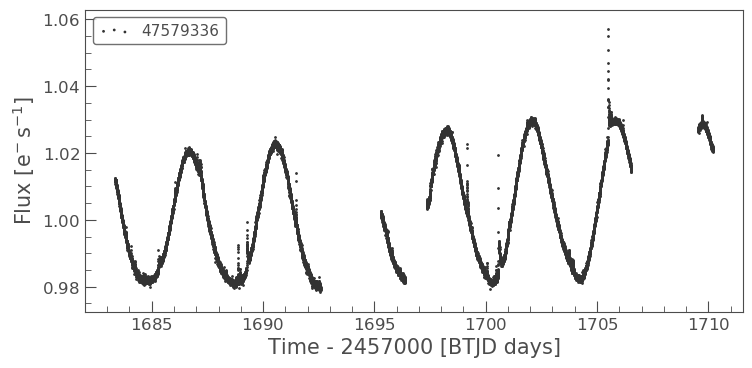

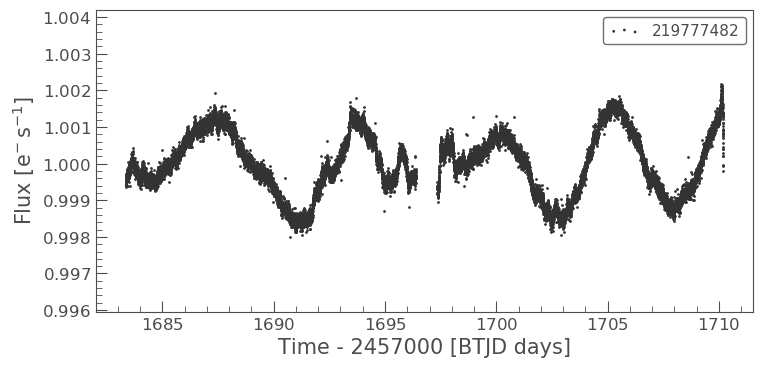

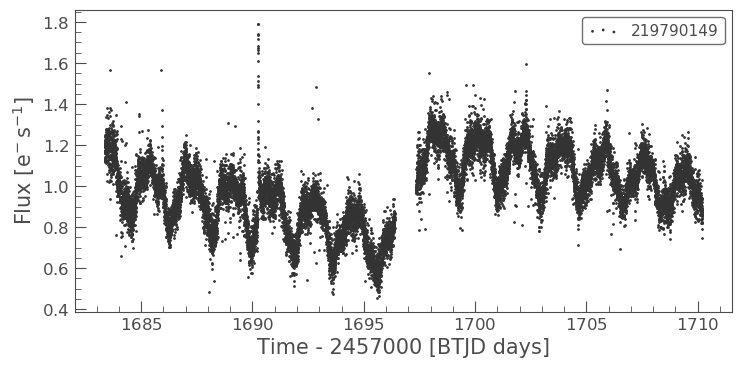

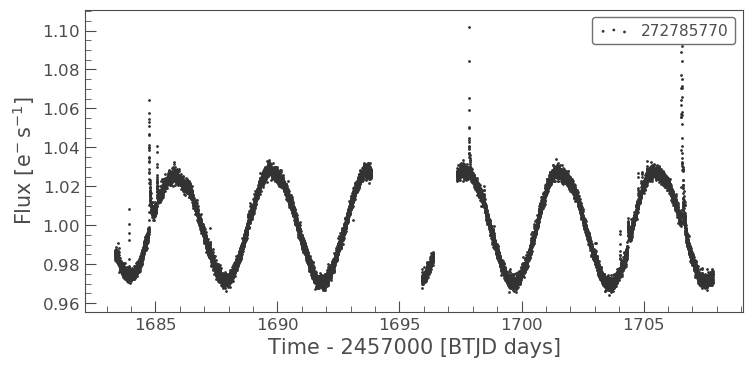

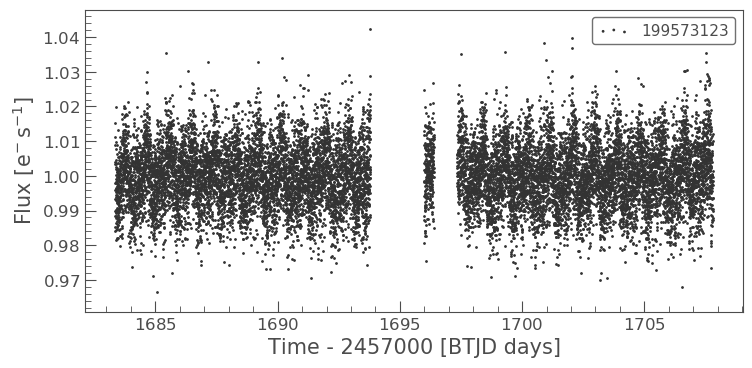

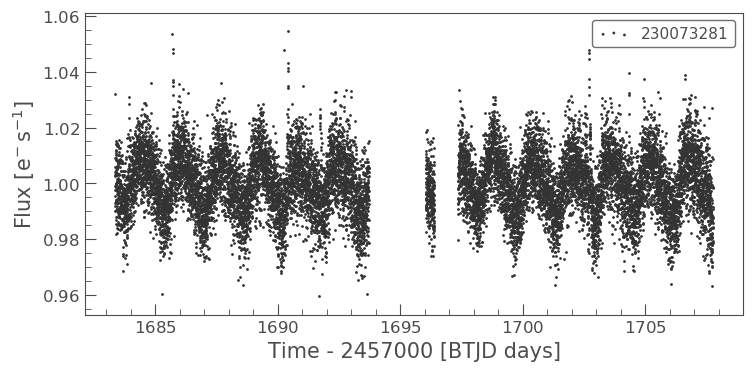

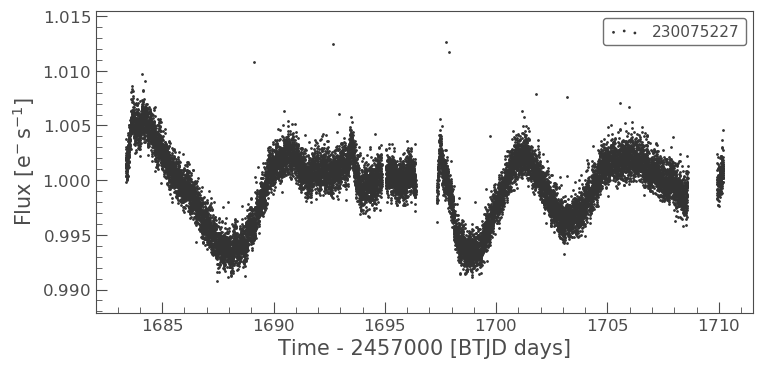

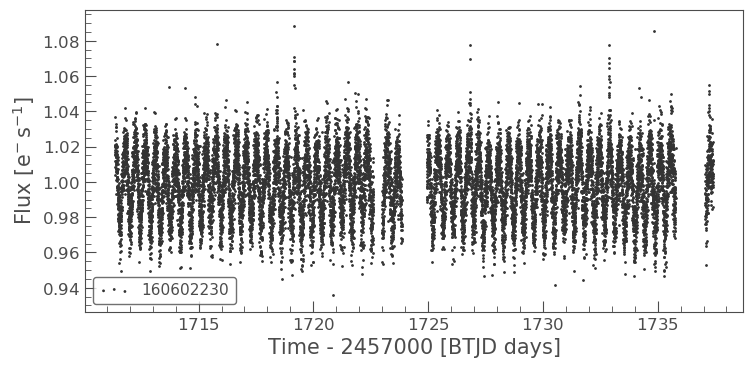

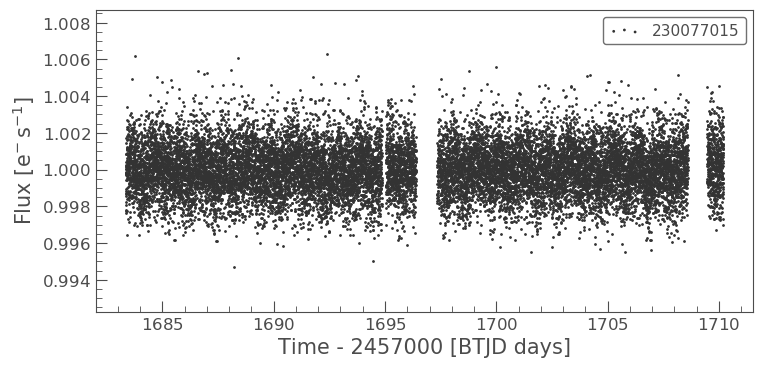

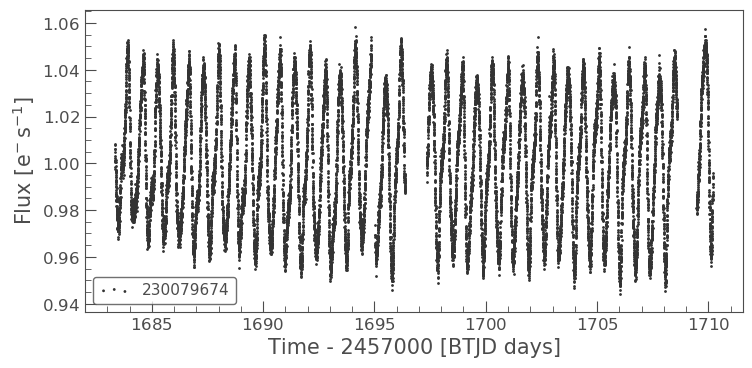

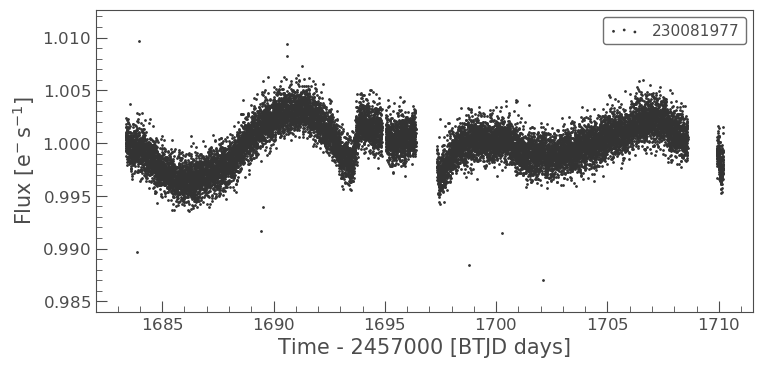

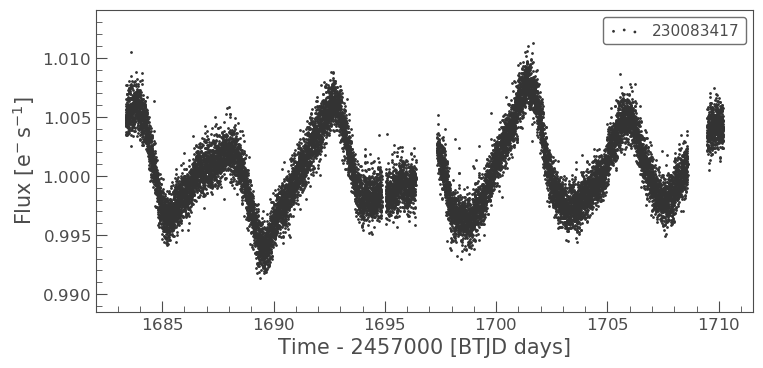

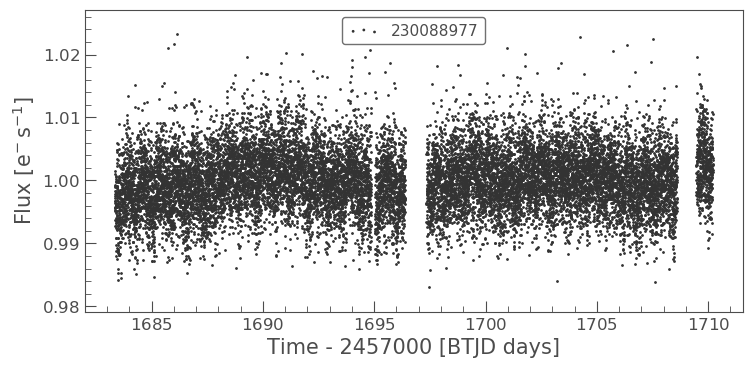

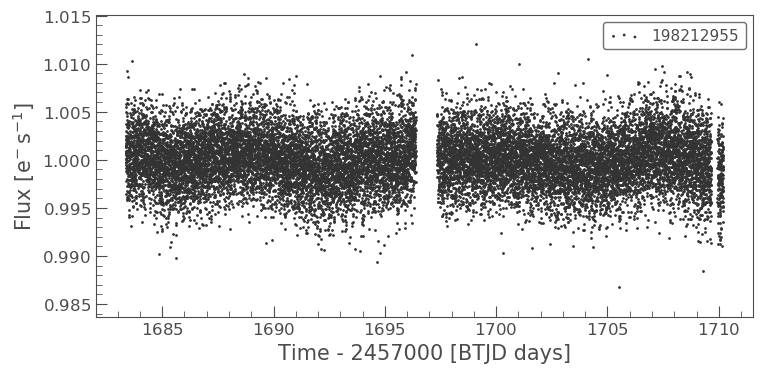

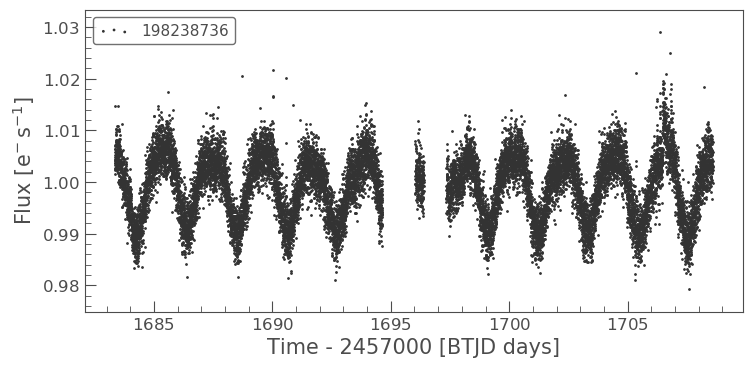

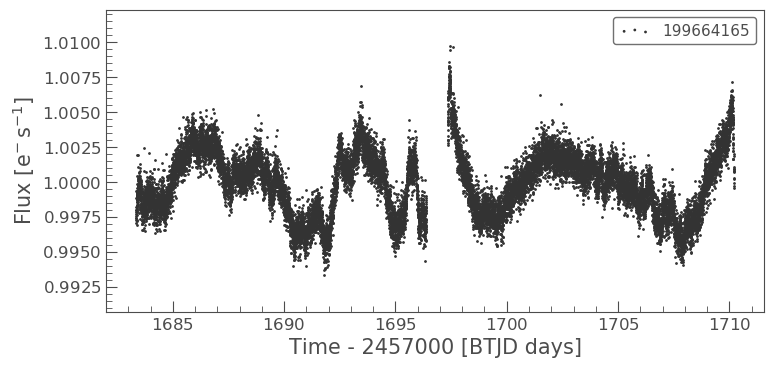

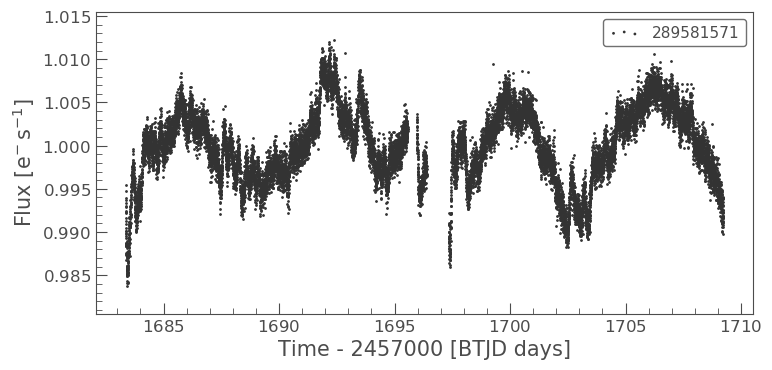

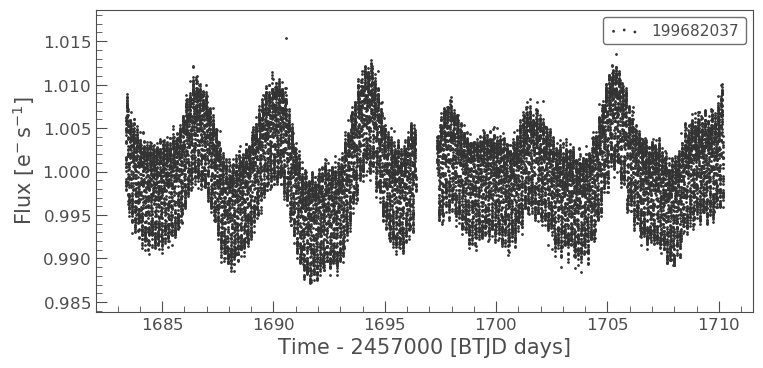

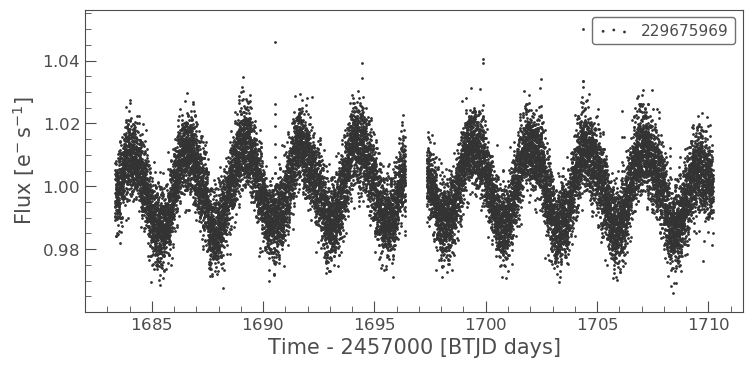

In [29]:
#data paths
secpath = '/Volumes/Seagate-stars/Final_Run/Clean_LCs_forBLS/{}/sec{}_lc.fits'#.format(tic,sec)
stitchpath = '/Volumes/Seagate-stars/Final_Run/Clean_LCs_forBLS/{}/stitched_lc.fits'#.format(tic)

count=0 
seen = {}
for tic,sec in missedtces[['TIC','Sector']].to_numpy():
    if tic not in seen:
        try:
            thepath = secpath.format(tic,sec)
            lcf = lk.open(thepath)
            lc = lcf.FLUX
            lc.scatter()
            print('Plot {}:'.format(count),tic,sec)
            count+=1
            seen[tic] = 1
        except FileNotFoundError:
            pass
    else:
        pass
    if count == 19:#to avoid too many plots
        break




In [30]:
#print tce stats for those "misclassified" tces (said no transit)
missedtcestats = alltce[np.isin(alltce['ticid'],missedtces['TIC'].unique())==True]
missedtcestats

,tceid,ticid,planetNumber,planetCandidateCount,starTeffKelvin,starLoggCgs,orbitalPeriodDays,orbitalPeriodDays_err,planetRadiusEarthRadii,planetRadiusEarthRadii_err,...,transitIngressTimeHours,minImpactParameter,ws_mes,ws_mesphase,expectedtransitcount,chiSquare2,mes,maxses,equilibriumTempKelvin,InsolationFlux
48,00140579674-01,140579674,1,2,5204.0,4.56867,167.53800,0.005281,6.53190,1.301260,...,1.058810,0.010000,8.66849,97.23750,2,6.74651,21.55810,16.61770,273.332,1.319110
49,00140579674-02,140579674,2,2,5204.0,4.56867,161.03200,0.003327,5.45421,1.165000,...,0.299487,0.010000,5.49431,26.61800,2,0.10536,13.96380,9.93831,276.964,1.390650
75,00140758953-01,140758953,1,3,3198.0,4.43800,181.82600,0.008156,9.63331,1.255650,...,0.499409,0.010812,6.53959,-6.09861,2,1.74932,14.22310,11.24240,178.008,0.237292
76,00140758953-02,140758953,2,3,3198.0,4.43800,226.94200,0.004657,10.99080,1.882640,...,0.229522,0.010000,8.33930,143.55700,2,0.77378,13.92860,10.67740,165.331,0.176579
77,00140758953-03,140758953,3,3,3198.0,4.43800,2.73572,0.000177,2.32917,1.502550,...,0.224296,0.129567,7.73724,1.34821,130,69.21340,8.04569,2.81731,721.056,63.884700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,00441795882-02,441795882,2,2,3284.0,4.91876,2.75961,0.000252,3.29727,3.251830,...,6.527810,0.990044,0.10918,0.91248,127,84.82886,14.77763,2.94446,504.056,15.255800
5652,00441806298-01,441806298,1,2,5323.0,4.44353,172.98200,0.004550,3.33752,1.648250,...,0.121100,0.184763,3.70379,1.89998,2,2.97363,12.41622,9.74969,298.224,1.869360
5653,00441806298-02,441806298,2,2,5323.0,4.44353,124.19800,0.003367,2.75426,1.455380,...,0.114061,0.519733,2.86334,38.84996,3,0.13948,11.01373,9.81653,333.047,2.907640
5750,00459979376-01,459979376,1,2,3248.0,4.92121,209.23000,0.003726,3.67897,0.451744,...,0.244638,0.010000,5.29353,40.91801,2,7.65362,13.52758,13.75818,117.532,0.045096


In [31]:
#data for first plot b/c otherwise printouts & plots dont show same targets b/c both are snippets
missedtcestats[missedtcestats['ticid']==47579336]

,tceid,ticid,planetNumber,planetCandidateCount,starTeffKelvin,starLoggCgs,orbitalPeriodDays,orbitalPeriodDays_err,planetRadiusEarthRadii,planetRadiusEarthRadii_err,...,transitIngressTimeHours,minImpactParameter,ws_mes,ws_mesphase,expectedtransitcount,chiSquare2,mes,maxses,equilibriumTempKelvin,InsolationFlux
173,00047579336-02,47579336,2,6,4622.0,4.55579,299.1770,0.004030,2.79015,0.326416,...,0.417129,0.399731,9.29776,17.86802,2,0.20855,24.27059,20.53121,198.367,0.365931
174,00047579336-01,47579336,1,6,4622.0,4.55579,47.5072,0.000376,2.96517,1.230970,...,0.082293,0.548261,11.65364,30.96663,8,0.15464,14.55854,10.85973,366.319,4.255570
175,00047579336-03,47579336,3,6,4622.0,4.55579,301.6090,0.016968,5.70143,0.647525,...,4.565390,0.821820,7.67802,-0.95697,2,0.77882,17.30992,13.22144,197.832,0.362002
176,00047579336-04,47579336,4,6,4622.0,4.55579,318.3990,0.003568,3.49200,0.348259,...,0.530377,0.015145,7.94175,8.84858,2,9.41678,13.10898,9.75757,194.292,0.336776
177,00047579336-06,47579336,6,6,4622.0,4.55579,100.5340,0.000782,2.70774,0.693420,...,0.115558,0.721760,8.63837,-13.05557,4,1.24690,10.40501,7.78280,285.326,1.566340
178,00047579336-05,47579336,5,6,4622.0,4.55579,327.5410,0.002768,2.62442,1.457750,...,0.081433,0.111538,6.11173,-0.46947,2,15.77889,14.22521,11.51872,192.467,0.324303


## check if 'no transit' examples came from 'variable' examples

In [32]:
onlyones = rf2_final[rf2_final['CLASS']==1]
train12 = pd.merge(onlyones,rf1_final, on='TIC')
print(len(onlyones['TIC'].unique()), len(train12['TIC'].unique()), 
     len(rf1_final[rf1_final['CLASS']==1]['TIC'].unique()))
#soo all 'no tranist' targets came from all of rf1_final that were classed periodic
#off by one but maybe thats counting errors? 0 start vs 1 start?--no see below

288 288 289


In [33]:
def returnNotMatches(a, b):
    '''
    inputs: a,b
            both lists or arrays
    outputs: not in b, not in a
            two lists
    '''
    return [[x for x in a if x not in b], [x for x in b if x not in a]] #not in b , not in a
notinb , notina =  returnNotMatches(train12['TIC'].unique(),rf1_final[rf1_final['CLASS']==1]['TIC'].unique()) 

In [34]:
print('missing tics:', notinb , notina)
rf2_final[rf2_final['TIC']==404768019]


missing tics: [] [404768019]


,Unnamed: 0,TIC,CLASS,Sector,rvar,ls-1,ls-2,ls-3,lsamp-1,lsamp-2,...,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,ID


In [35]:
print('so below example could be an EB or close binary BUT i didnt use it in', 
      'rf-2 training set only in rf-1 when it was a variable example == its ok')
rf1_final[rf1_final['TIC']==404768019]

so below example could be an EB or close binary BUT i didnt use it in rf-2 training set only in rf-1 when it was a variable example == its ok


,Unnamed: 0,TIC,CLASS,Sector,rvar,ls-1,ls-2,ls-3,lsamp-1,lsamp-2,...,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,ID
147,147,404768019,1,SCVZ-stitched,0.056316,0.722256,0.71914,0.725398,0.496625,0.129583,...,0.93884,0.878387,84.644054,-68.885047,0.027778,0.031189,1,0,548795752,404768019.0


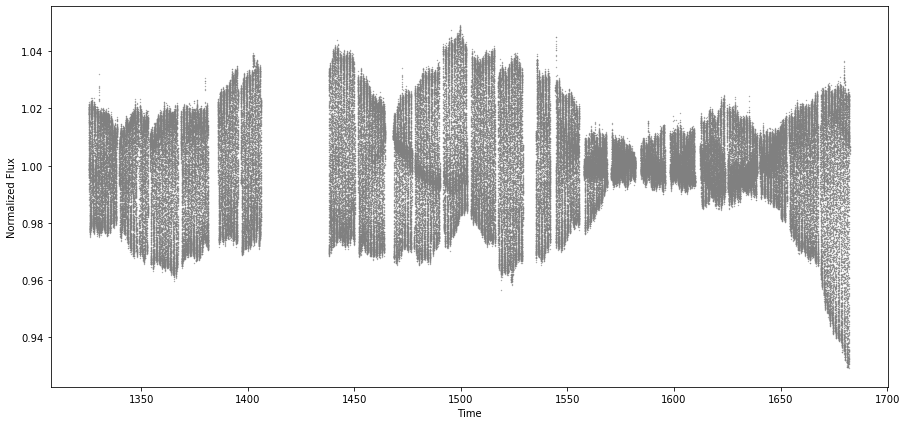

In [36]:
#stitched lc
stitchpath = '/Volumes/Seagate-stars/Final_Run/Clean_LCs_forBLS/{}/stitched_lc.fits'#.format(tic)
tic = 404768019
thepath = stitchpath.format(tic)
lcf = lk.open(thepath)
lc = lcf.FLUX
# lc.scatter() #cant see need to customized below
plt.figure(figsize=(15,7))
plt.scatter(lc.time,lc.flux,s=.1,color='grey',rasterized=True)
plt.ylabel('Normalized Flux'); plt.xlabel('Time');
# plt.xlim(1450,1600); #small zoom in 
# plt.xlim(1480,1490); #deeper zoom in - EB?

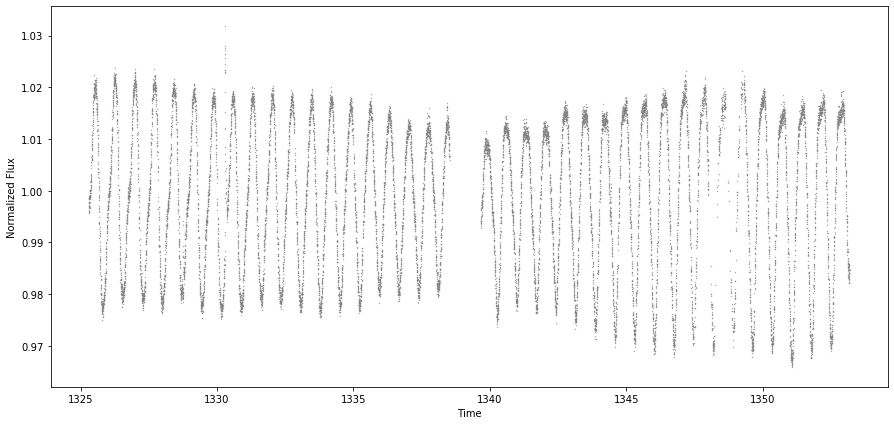

In [37]:
#single sector-----this is why i chose class='variable','no transit' instead of EB...maybe binary then?
tic = 404768019
thepath = secpath.format(tic,1)
lcf = lk.open(thepath)
lc = lcf.FLUX
# lc.scatter()
plt.figure(figsize=(15,7))
plt.scatter(lc.time,lc.flux,s=.1,color='grey',rasterized=True)
plt.ylabel('Normalized Flux'); plt.xlabel('Time');



## different stuff

In [31]:
# #load data sets

# # train sets
# rf1_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf1_training.csv')
# rf2_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf2_training.csv')
# rf3_final = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf3_training.csv')
# #original stats df
# allstats = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/master_df.csv')#includes ncvz google df & tois in rf2
# mqdata = pd.read_csv('data/mcquillan_sample.csv')




In [32]:
#check for sectors in training sets that dont agree

# rf3_final['Sector'].unique() #problem = multiple names 14 vs 14.0 & no SCVZ-stitched(unless those are 14.5)


In [33]:
# sector = 15
# interns = pd.read_csv('/Volumes/Seagate-stars/SECTORS/INTERN_RESULTS/bls_statsdf_sec{}.csv'.format(sector))
# interns = interns.drop(columns='Unnamed: 0') #b/c forgot "index=False" when writing to file
# interns

In [34]:
# max(interns['Power'].to_numpy())

# Useful functions

In [15]:
# unique item finder

def uniquefinder(mylist):
    '''
    Function finds unique values within a list, also stats on occurance rates
    
    inputs: an array or list 
            (integers or strings)
    2 outputs: dictionary of occurances, list of unique values 
    '''
    seen = {}
    dupes = []
    uniq_tics = []
    for x in mylist:
        if x not in seen:
            seen[x] = 1
            uniq_tics.append(x)
        else:
            if seen[x] == 1:
                dupes.append(x)
            seen[x] += 1
    uniques = len(uniq_tics)
    print('There are {} unique tics out of the original {}.'.format(uniques,len(mylist)),\
        '\nUse the first output dictionary', \
          'to see number of occurances for duplicates')
    return seen, uniq_tics


#useful fcn - compares lists & returns what didnt match
def returnNotMatches(a, b):
    '''
    inputs: a,b
            both lists or arrays
    outputs: not in b, not in a
            two lists
    '''
    return [[x for x in a if x not in b], [x for x in b if x not in a]] #not in b , not in a


def find_range(x, axis=0):
    return np.max(x, axis=axis) - np.min(x, axis=axis)


def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return m.floor(n * multiplier) / multiplier


def round_up(n, decimals=0): 
    multiplier = 10 ** decimals 
    return m.ceil(n * multiplier) / multiplier


# based on training set
def label_meanings(label):
    ''' 
    1== Periodic = "very clear periodicity in light curve"; 
    2==Complex = "clear periodicity but complicated by multiple spots or low signal to noise";
    3== EB = "eclipsing binaries"; 
    4==Binaries = "likely eclipsing binaries too"; 
    5==Flat = "no rotational modulation"
    '''
    mydictionary = {1:'Astrophysical Signal',3:'Likely Eclipsing Binary',5:'Flat',2:'nothing',4:'nothing'}
    return(mydictionary[label])

def abs_mag(m,D):
    '''
    ~converts apparent mag to absolute mag~
    args:
          m: apparent mag
          D: 1/parallax in parsecs
    RETURNS: absolute mag
    '''
    return m - 5*np.log10(D) + 5

def mas_to_parsec(mas):
    '''
    ~converts milliarcseconds(mas) to parsecs, useful b/c Gaia parallax in mas~
    args:
         mas: parallax measure in mas
    RETURNS: parallax in parsecs
    '''
    return mas / 1000

def get_D(parallax):
    '''
    ~converts parallax to distance~
    args:
        parrallax: parallax measure in mas
    RETURNS: distance
    '''
    plx = mas_to_parsec(parallax)
    return 1/plx

def slope(x1,x2,y1,y2):
    ''' 
    inputs: coordinates for 2 plotted datapoints
    returns: slope
    '''
    m = (y2 -y1) / (x2-x1)
    return (y2 -y1) / (x2-x1)

def get_b(m,x,y):
    '''
    gives y-intercept(b) for a straight line
    inputs: slope(m); point on line(x,y)
    returns: b
    '''
    b = -(m*x) + y
    return b

# Fix Formating of EXAMPLES

In [16]:
#load data

#training/testing examples from CVZ 
labels_data = ascii.read('data/master_bls_bigstats_stitchedlcs.fits')
labels = pd.read_csv('data/RF2_Classification_TICS_3.csv', header=4)
#training/testing examples from Sectors 14&15
morelabels = pd.read_csv('data/RF1-TrainingSet.csv')

#stats for sec14&15 examples
unseen = pd.read_csv('/Volumes/Seagate-stars/SECTORS/allstats_14_15.csv') #unseen data WITH bls stats

In [17]:
#format cvz examples


#make formats match
labels_data_df = labels_data.to_pandas()
#rename column for matching ease
labels_data_df = labels_data_df.rename(columns={"ID": 'TIC'})
#match CVZ labels into one df
features = pd.merge(labels_data_df, labels, on='TIC')#lose 7 here but its ok, proceed
#drop high teff CVZ examples
features = features[features['Teff']<=6500] #lost 43 here but its ok, proceed
features


/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: TableReplaceWarning: converted column 'HIP' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: TableReplaceWarning: converted column 'KIC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: TableReplaceWarning: converted column 'numcont' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: TableReplaceWarning: converted column 'gaiaqflag' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: TableReplaceWarnin

,TIC,TOTsecs,rvar,ls1,ls2,ls3,lsamp1,lsamp2,lsamp3,acf1,...,power,period,depth,transit_time,duration,CLASS,LS_correct,ACF_correct,ACF2_correct,# comments
1,25078924,13,0.092320,0.906772,0.902284,0.896550,0.294121,0.062172,0.057633,0.904167,...,2128,1.808656,0.003801,0.624,0.16,3,NaN,NaN,NaN,NaN
3,25155310,13,0.005393,1.644398,1.096231,0.822214,0.037454,0.036482,0.034500,3.288892,...,6023,3.288786,0.001560,2.208,0.16,3,NaN,NaN,NaN,NaN
6,30313682,12,0.036663,2.863217,1.431896,0.954571,0.134459,0.102553,0.087986,2.863891,...,12441,5.727675,0.095033,4.592,0.16,3,NaN,NaN,NaN,NaN
8,31273263,11,0.018080,12.559911,12.007478,6.253588,0.329218,0.129200,0.094600,12.776399,...,27070,11.286806,0.000296,1.360,0.16,3,1.0,1.0,1.0,# could be a 1 b/c its a huge planet with ~ 22...
10,32150630,12,0.057739,1.485555,0.745751,1.494213,0.452719,0.104419,0.077054,1.491668,...,1295,1.492110,0.006370,0.448,0.16,1,1.0,1.0,0.0,# acf2 is a double harmonic; also these rps ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,364302118,12,0.035577,0.672685,1.346318,1.380921,0.440631,0.052412,0.032581,1.345834,...,909,1.345427,0.007843,1.104,0.16,3,NaN,NaN,NaN,NaN
334,382069441,12,0.035260,5.477068,5.594156,5.365352,0.634746,0.129890,0.104538,5.488893,...,40711,16.470489,0.002633,1.792,0.16,3,NaN,NaN,NaN,#investigate this huge planet more
335,382517745,13,0.008261,10.419558,5.311744,5.424710,0.090711,0.085972,0.061831,10.441675,...,24844,10.440909,0.000277,1.232,0.16,3,NaN,NaN,NaN,NaN
337,404768019,12,0.056316,0.722297,0.719017,0.725462,0.506582,0.136337,0.124000,0.720834,...,1170,1.444609,0.000082,0.480,0.16,1,1.0,1.0,0.0,"#acf2 is a double harmonic, ls-2 could also be..."


In [18]:
#format secs15&15 examples

#this one line not really necessary - but makes df easier to read by pulling relevant columns
morelabels = morelabels[['Periodic','P_sector','Non-periodic','NP_sector']]
#pull columns & remove nans
sec1415_tics_p = morelabels['Periodic'].to_numpy()[~np.isnan(morelabels['Periodic'].to_numpy())] 
sec1415_tics_np = morelabels['Non-periodic'].to_numpy()[~np.isnan(morelabels['Non-periodic'].to_numpy())]
sec1415_secs_p = morelabels['P_sector'].to_numpy()[~np.isnan(morelabels['P_sector'].to_numpy())]
sec1415_secs_np = morelabels['NP_sector'].to_numpy()[~np.isnan(morelabels['NP_sector'].to_numpy())]
#generate labels
periodics_label_list = np.repeat(1,len(sec1415_tics_p))
nonperiodics_label_list = np.repeat(5,len(sec1415_tics_np))
#combine columns
sec1415_labels = np.append(periodics_label_list, nonperiodics_label_list)
sec1415_tics = np.append(sec1415_tics_p, sec1415_tics_np)
sec1415_secs = np.append(sec1415_secs_p, sec1415_secs_np)

#put into new df
sec1415_info = {'TIC': sec1415_tics, 'Sector': sec1415_secs, 'CLASS': sec1415_labels}
extralabels_1 = pd.DataFrame(sec1415_info)
#merge these examples with their data 
extralabels_2 = pd.merge(unseen, extralabels_1, on=['TIC','Sector'])
#rename some columns to match features
extralabels_3 = extralabels_2.rename(columns={"ls-1": 'ls1','ls-2':'ls2','ls-3':'ls3','lsamp-1':'lsamp1',
                                         'lsamp-2':'lsamp2','lsamp-3':'lsamp3'})

In [19]:
# combine cvz & sec14-15 examples


print('Before merge length:',len(features))
#merge with CVZ features 
features = pd.concat([features, extralabels_3])

#do a teff cut to match desired range
features = features[features['Teff']<=6500]
#do another cut if dont have necessary data to be sure on MS
step1 = features[pd.notna(features['plx']).to_numpy()]
step2 = step1[pd.notna(step1['GAIAmag'].to_numpy())]
features = step2[pd.notna(step2['Teff'].to_numpy())]
print('After merge length:',len(features))
features

Before merge length: 297
After merge length: 351


,TIC,TOTsecs,rvar,ls1,ls2,ls3,lsamp1,lsamp2,lsamp3,acf1,...,LS_correct,ACF_correct,ACF2_correct,# comments,period_bls,power_bls,depth_bls,dur_bls,tt_bls,Sector
1,25078924,13.0,0.092320,0.906772,0.902284,0.896550,0.294121,0.062172,0.057633,0.904167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25155310,13.0,0.005393,1.644398,1.096231,0.822214,0.037454,0.036482,0.034500,3.288892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30313682,12.0,0.036663,2.863217,1.431896,0.954571,0.134459,0.102553,0.087986,2.863891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,31273263,11.0,0.018080,12.559911,12.007478,6.253588,0.329218,0.129200,0.094600,12.776399,...,1.0,1.0,1.0,# could be a 1 b/c its a huge planet with ~ 22...,NaN,NaN,NaN,NaN,NaN,NaN
11,38586438,11.0,0.021472,1.110549,0.555587,1.115110,0.242232,0.179837,0.042648,1.111112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,202426247,NaN,4452.032031,4.419334,2.215200,6.006660,0.787052,0.254805,0.144533,NaN,...,NaN,NaN,NaN,NaN,0.309322,170.0,0.000067,0.29,0.172,15.0
73,219777482,NaN,7216.475000,5.705380,9.929934,3.245566,0.575338,0.414778,0.011112,NaN,...,NaN,NaN,NaN,NaN,0.300378,7.0,0.000024,0.29,0.147,15.0
74,224306020,NaN,1661.129688,2.790292,1.378471,2.372766,0.492578,0.369525,0.086369,NaN,...,NaN,NaN,NaN,NaN,0.300108,2.0,0.000036,0.29,0.145,15.0
75,230077650,NaN,2942.876562,4.139007,2.161909,5.357952,0.785663,0.167051,0.080532,NaN,...,NaN,NaN,NaN,NaN,0.302658,49.0,0.000046,0.29,0.151,15.0


# Keep only Main Sequence stars

/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in log10


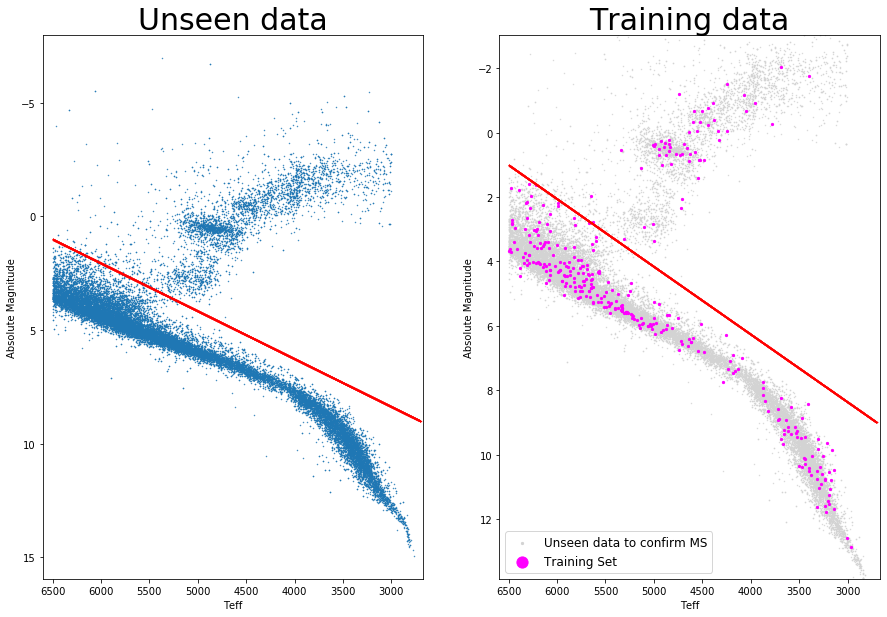

In [20]:
## add Abs_Mag column & find division line ---to remove giants from unseen & training data

## for unseen
u_abs_GAIAmag = []
u_teffs =[]
for plx,mag,temp in unseen[['plx','GAIAmag','Teff']].to_numpy():
    D = get_D(plx)
    newmag=abs_mag(mag,D)
    u_abs_GAIAmag.append(newmag)
    u_teffs.append(temp)
#add to df
unseen['GAIA_AbsMag'] = u_abs_GAIAmag
    
## for training
t_abs_GAIAmag = []
t_teffs =[]
for plx,mag,temp in features[['plx','GAIAmag','Teff']].to_numpy():
    D = get_D(plx)
    newmag=abs_mag(mag,D)
    t_abs_GAIAmag.append(newmag)
    t_teffs.append(temp)
#add to df
features['GAIA_AbsMag'] = t_abs_GAIAmag


################note that red line is the SAME on both plots to ensure training & predicitions share same parameter space
## for unseen
#determine division line params
u_pt1 = [6500,1] #u_pt1 = [6500,31]
u_pt2 = [2700,9] #u_pt2 = [2700,39]
u_m = slope(u_pt1[0],u_pt2[0],u_pt1[1],u_pt2[1])
u_b = get_b(u_m,u_pt1[0],u_pt1[1])
#create arrays for line
u_xarr = np.arange(u_pt2[0],u_pt1[0],1)
u_yarr = [u_m*x + u_b for x in u_xarr]
## for training
#determine division line params
t_pt1 = [6500,1] #t_pt1 = [6500,31]
t_pt2 = [2700,9] #t_pt2 = [2700,39]
t_m = slope(t_pt1[0],t_pt2[0],t_pt1[1],t_pt2[1])
t_b = get_b(t_m,t_pt1[0],t_pt1[1])
#create arrays for line
t_xarr = np.arange(t_pt2[0],t_pt1[0],1)
t_yarr = [t_m*x + t_b for x in t_xarr]
    
## plot them
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10))
ax1.scatter(u_teffs,u_abs_GAIAmag,s=.2)
ax1.scatter(u_xarr,u_yarr,color='r',s=.2)
ax1.set_ylabel('Absolute Magnitude');ax1.set_xlabel('Teff');
ax1.set_xlim(max(u_teffs)+100,min(u_teffs)-100)
ax1.set_title('Unseen data',fontsize=30);
ax1.set_ylim(max(u_abs_GAIAmag)+1,min(u_abs_GAIAmag)-1);

ax2.scatter(u_teffs,u_abs_GAIAmag,s=.2,label='Unseen data to confirm MS',color='lightgrey')
ax2.scatter(t_teffs,t_abs_GAIAmag,s=5,label='Training Set',color='magenta')
ax2.scatter(t_xarr,t_yarr,color='r',s=.2)
ax2.legend(fontsize='large',markerscale=5)
ax2.set_ylabel('Absolute Magnitude');ax2.set_xlabel('Teff');
ax2.set_xlim(max(t_teffs)+100,min(t_teffs)-300)
ax2.set_ylim(max(t_abs_GAIAmag)+1,min(t_abs_GAIAmag)-1);
ax2.set_title('Training data',fontsize=30);

For training examples use: 
------------------ 
"features_nogiants" 
 
For unseen data use: 
------------------ 
"unseen_nogiants"


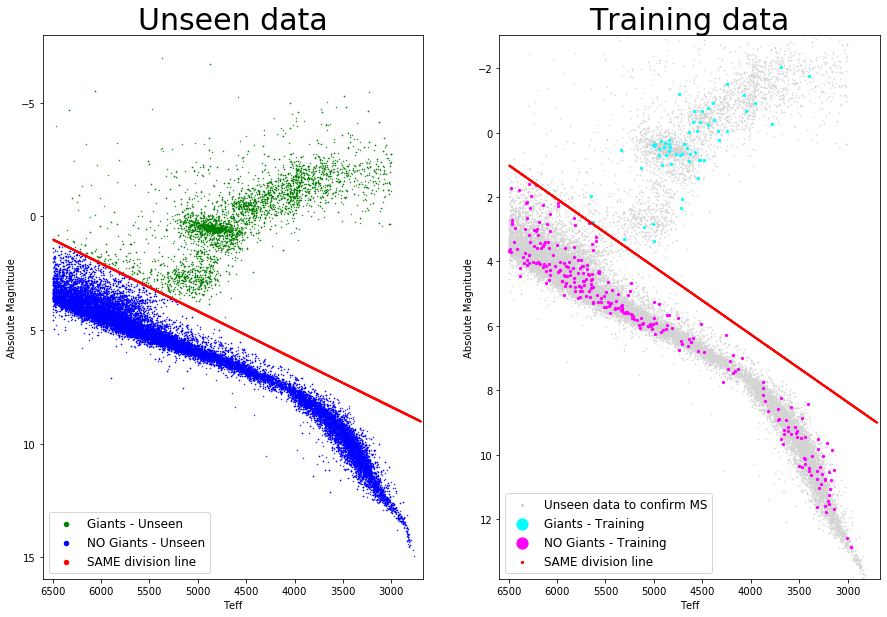

In [21]:
## remove giants & replot to confirm

#do cut for unseen
compare_values = [u_m*x + u_b for x in unseen['Teff'].to_numpy()] #ABSmagnitude value on the red line at star's teff
unseen_nogiants = unseen[[unseen['GAIA_AbsMag'].to_numpy()[i] > compare_values[i] for i in range(len(compare_values))]]
unseen_giantsonly = unseen[[unseen['GAIA_AbsMag'].to_numpy()[i] <= compare_values[i] for i in range(len(compare_values))]]

#do cut for features
compare_values = [t_m*x + t_b for x in features['Teff'].to_numpy()] #ABSmagnitude value on the red line at star's teff
features_nogiants = features[[features['GAIA_AbsMag'].to_numpy()[i] > compare_values[i] for i in range(len(compare_values))]]
features_giantsonly = features[[features['GAIA_AbsMag'].to_numpy()[i] <= compare_values[i] for i in range(len(compare_values))]]
######## note that both "compare_values" are the SAME


#plot to verify cut
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10))
ax1.scatter(unseen_giantsonly['Teff'].to_numpy(),unseen_giantsonly['GAIA_AbsMag'].to_numpy(),s=.2,color='g',label='Giants - Unseen')
ax1.scatter(unseen_nogiants['Teff'].to_numpy(),unseen_nogiants['GAIA_AbsMag'].to_numpy(),s=.2,color='b',label='NO Giants - Unseen')
ax1.scatter(u_xarr,u_yarr,color='r',s=.2,label='SAME division line')
ax1.legend(fontsize='large',markerscale=10)
ax1.set_ylabel('Absolute Magnitude');ax1.set_xlabel('Teff');
ax1.set_xlim(max(u_teffs)+100,min(u_teffs)-100)
ax1.set_title('Unseen data',fontsize=30);
ax1.set_ylim(max(u_abs_GAIAmag)+1,min(u_abs_GAIAmag)-1);

ax2.scatter(u_teffs,u_abs_GAIAmag,s=.2,label='Unseen data to confirm MS',color='lightgrey')
ax2.scatter(features_giantsonly['Teff'].to_numpy(),features_giantsonly['GAIA_AbsMag'].to_numpy(),s=5,label='Giants - Training',color='cyan')
ax2.scatter(features_nogiants['Teff'].to_numpy(),features_nogiants['GAIA_AbsMag'].to_numpy(),s=5,label='NO Giants - Training',color='magenta')
ax2.scatter(t_xarr,t_yarr,color='r',s=.2,label='SAME division line')
ax2.legend(fontsize='large',markerscale=5)
ax2.set_ylabel('Absolute Magnitude');ax2.set_xlabel('Teff');
ax2.set_xlim(max(t_teffs)+100,min(t_teffs)-300)
ax2.set_ylim(max(t_abs_GAIAmag)+1,min(t_abs_GAIAmag)-1);
ax2.set_title('Training data',fontsize=30);

print('For training examples use: \n------------------ \n"features_nogiants" \n \nFor unseen data use: \n------------------ \n"unseen_nogiants"')

# One master df

In [22]:
#merge these so can know which unseen stars are really in the training set

#checking what columns differ
print('FEATURES:',len(list(features_nogiants.columns)),list(features_nogiants.columns))
print('UNSEEN:',len(list(unseen_nogiants.columns)),list(unseen_nogiants.columns))

FEATURES: 156 ['TIC', 'TOTsecs', 'rvar', 'ls1', 'ls2', 'ls3', 'lsamp1', 'lsamp2', 'lsamp3', 'acf1', 'acf2', 'acf3', 'acfamp1', 'acfamp2', 'acfamp3', 'version', 'HIP', 'TYC', 'UCAC', 'TWOMASS', 'SDSS', 'ALLWISE', 'GAIA', 'APASS', 'KIC', 'objType', 'typeSrc', 'ra', 'dec', 'POSflag', 'pmRA', 'e_pmRA', 'pmDEC', 'e_pmDEC', 'PMflag', 'plx', 'e_plx', 'PARflag', 'gallong', 'gallat', 'eclong', 'eclat', 'Bmag', 'e_Bmag', 'Vmag', 'e_Vmag', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'TWOMflag', 'prox', 'w1mag', 'e_w1mag', 'w2mag', 'e_w2mag', 'w3mag', 'e_w3mag', 'w4mag', 'e_w4mag', 'GAIAmag', 'e_GAIAmag', 'Tmag', 'e_Tmag', 'TESSflag', 'SPFlag', 'Teff', 'e_Teff', 'logg', 'e_logg', 'MH', 'e_MH', 'rad', 'e_rad', 'mass', 'e_mass', 'rho', 'e_rho', 'lumclass', 'lum', 'e_lum', 'd', 'e_d', 'ebv', 'e_ebv', 'numcont', 'contratio', 'disposition', 'duplicate_id', 'priority', 'eneg_EBV', 'epos_EBV', 'EBVflag', '

In [23]:
#dropping unnecessary columns

features_nogiants = features_nogiants.drop(columns=['ACF_correct', 'ACF2_correct', '# comments'])
features_nogiants

,TIC,TOTsecs,rvar,ls1,ls2,ls3,lsamp1,lsamp2,lsamp3,acf1,...,duration,CLASS,LS_correct,period_bls,power_bls,depth_bls,dur_bls,tt_bls,Sector,GAIA_AbsMag
1,25078924,13.0,0.092320,0.906772,0.902284,0.896550,0.294121,0.062172,0.057633,0.904167,...,0.16,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.354238
3,25155310,13.0,0.005393,1.644398,1.096231,0.822214,0.037454,0.036482,0.034500,3.288892,...,0.16,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.375336
6,30313682,12.0,0.036663,2.863217,1.431896,0.954571,0.134459,0.102553,0.087986,2.863891,...,0.16,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.839090
11,38586438,11.0,0.021472,1.110549,0.555587,1.115110,0.242232,0.179837,0.042648,1.111112,...,0.16,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.858330
14,38907305,13.0,0.004499,1.288280,1.293625,1.284414,0.018083,0.018049,0.017965,0.780556,...,0.16,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.168263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,202426247,NaN,4452.032031,4.419334,2.215200,6.006660,0.787052,0.254805,0.144533,NaN,...,NaN,1,NaN,0.309322,170.0,0.000067,0.29,0.172,15.0,4.921991
73,219777482,NaN,7216.475000,5.705380,9.929934,3.245566,0.575338,0.414778,0.011112,NaN,...,NaN,1,NaN,0.300378,7.0,0.000024,0.29,0.147,15.0,4.279710
74,224306020,NaN,1661.129688,2.790292,1.378471,2.372766,0.492578,0.369525,0.086369,NaN,...,NaN,1,NaN,0.300108,2.0,0.000036,0.29,0.145,15.0,3.050518
75,230077650,NaN,2942.876562,4.139007,2.161909,5.357952,0.785663,0.167051,0.080532,NaN,...,NaN,1,NaN,0.302658,49.0,0.000046,0.29,0.151,15.0,4.181664


In [24]:
#can delete
print('FEATURES:',len(list(features_nogiants.columns)))
print('UNSEEN:',len(list(unseen_nogiants.columns)))

FEATURES: 153
UNSEEN: 139


In [25]:
#checking if bls stats match just have diff col names ---they do, see print stmt

pd.set_option('display.max_columns', None) #show all columns
#pd.reset_option(“max_columns”) #reset number columns to display

print('from this looks like just have a prior merge that had diff colnames for the bls stats')
features_nogiants.iloc[0:2][['TIC','rvar', 'ls1', 'ls2', 'ls3', 'lsamp1', 'lsamp2', 'lsamp3','power', 'period', 'depth', 'transit_time', 'duration','period_bls', 'power_bls', 'depth_bls', 'dur_bls', 'tt_bls']]

from this looks like just have a prior merge that had diff colnames for the bls stats


,TIC,rvar,ls1,ls2,ls3,lsamp1,lsamp2,lsamp3,power,period,depth,transit_time,duration,period_bls,power_bls,depth_bls,dur_bls,tt_bls
1,25078924,0.092320,0.906772,0.902284,0.896550,0.294121,0.062172,0.057633,2128.0,1.808656,0.003801,0.624,0.16,NaN,NaN,NaN,NaN,NaN
3,25155310,0.005393,1.644398,1.096231,0.822214,0.037454,0.036482,0.034500,6023.0,3.288786,0.001560,2.208,0.16,NaN,NaN,NaN,NaN,NaN


In [26]:
# changing features df so the multiple bls col names match

badnames = ['power', 'period', 'depth', 'transit_time', 'duration']
goodnames = ['power_bls', 'period_bls', 'depth_bls', 'tt_bls', 'dur_bls']
amp = []; per = []; dep = []; tt = []; dur = []
for i in range(len(badnames)):
    g = goodnames[i]
    b = badnames[i]
    goodcol = features_nogiants[g].to_numpy()
    badcol = features_nogiants[b].to_numpy()
    for count,gval in enumerate(goodcol):
        bval = badcol[count]
        if np.isnan(bval)==True:
            if i == 0:
                amp.append(gval)
            elif i ==1:
                per.append(gval)
            elif i ==2:
                dep.append(gval)
            elif i ==3:
                tt.append(gval)
            elif i ==4:
                dur.append(gval)
            else:
                print('problem')
        elif np.isnan(gval)==True:
            if i == 0:
                amp.append(bval)
            elif i ==1:
                per.append(bval)
            elif i ==2:
                dep.append(bval)
            elif i ==3:
                tt.append(bval)
            elif i ==4:
                dur.append(bval)
            else:
                print('problem')
        elif bval == gval:
            print('problem they match')
        else:
            pass
#             print('no match',bval,gval)
        
print(len(features_nogiants['power'].to_numpy()), len(amp))

292 292


In [27]:
#drop unneeded columns

#add correct title columns
features_nogiants['power_bls'] = amp
features_nogiants['period_bls'] = per
features_nogiants['depth_bls'] = dep
features_nogiants['tt_bls'] = tt
features_nogiants['dur_bls'] = dur

In [28]:
#drop wrongly named columns now that data saved under correct column name

#check of changes -- good
#features_nogiants[['power', 'period', 'depth', 'transit_time', 'duration','power_bls','period_bls','depth_bls','tt_bls','dur_bls']]
#drop unneeded columns
features_nogiants = features_nogiants.drop(columns = ['power', 'period', 'depth', 'transit_time', 'duration',
                                                     'acf1','acf2','acf3','acfamp1','acfamp2','acfamp3'])
#rename ls stats in features to match unseen
diff_cols_f2u = {'ls1':'ls-1', 'ls2':'ls-2', 'ls3':'ls-3', 'lsamp1':'lsamp-1', 
                 'lsamp2':'lsamp-2', 'lsamp3':'lsamp-3'}
features_nogiants = features_nogiants.rename(columns=diff_cols_f2u)
#recompare columns 
print('FEATURES:',len(list(features_nogiants.columns)),list(features_nogiants.columns))
print('UNSEEN:',len(list(unseen_nogiants.columns)),list(unseen_nogiants.columns))

FEATURES: 142 ['TIC', 'TOTsecs', 'rvar', 'ls-1', 'ls-2', 'ls-3', 'lsamp-1', 'lsamp-2', 'lsamp-3', 'version', 'HIP', 'TYC', 'UCAC', 'TWOMASS', 'SDSS', 'ALLWISE', 'GAIA', 'APASS', 'KIC', 'objType', 'typeSrc', 'ra', 'dec', 'POSflag', 'pmRA', 'e_pmRA', 'pmDEC', 'e_pmDEC', 'PMflag', 'plx', 'e_plx', 'PARflag', 'gallong', 'gallat', 'eclong', 'eclat', 'Bmag', 'e_Bmag', 'Vmag', 'e_Vmag', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'TWOMflag', 'prox', 'w1mag', 'e_w1mag', 'w2mag', 'e_w2mag', 'w3mag', 'e_w3mag', 'w4mag', 'e_w4mag', 'GAIAmag', 'e_GAIAmag', 'Tmag', 'e_Tmag', 'TESSflag', 'SPFlag', 'Teff', 'e_Teff', 'logg', 'e_logg', 'MH', 'e_MH', 'rad', 'e_rad', 'mass', 'e_mass', 'rho', 'e_rho', 'lumclass', 'lum', 'e_lum', 'd', 'e_d', 'ebv', 'e_ebv', 'numcont', 'contratio', 'disposition', 'duplicate_id', 'priority', 'eneg_EBV', 'epos_EBV', 'EBVflag', 'eneg_Mass', 'epos_Mass', 'eneg_Rad', 'epos_Rad', 'e

In [29]:
#checking how to merge & properly match examples from secs 14&15 while appending cvz examples

#only diffs between dfs now - but these are needed
diff_cols_features = ['TOTsecs','CLASS','LS_correct']
diff_cols_unseen = []

#these didnt work
#merge to one df
# print('Before merge - features/unseen:',len(features_nogiants),len(unseen), 'total:',len(features_nogiants)+len(unseen))
#need to drop cvz examples from features
# sec1415_features = features_nogiants[(features_nogiants['Sector'] == 14.) | (features_nogiants['Sector'] == 15.)]
# sec1415_features

#found division for features betwn secs1415 & cvz examples---up to 214 is cvz; 215+ is sec1415
for count,i in enumerate(features_nogiants['TOTsecs'].to_numpy()): #TOTsecs
    print(count,':',i)

0 : 13.0
1 : 13.0
2 : 12.0
3 : 11.0
4 : 13.0
5 : 13.0
6 : 13.0
7 : 13.0
8 : 13.0
9 : 12.0
10 : 12.0
11 : 12.0
12 : 11.0
13 : 12.0
14 : 12.0
15 : 11.0
16 : 13.0
17 : 10.0
18 : 13.0
19 : 13.0
20 : 12.0
21 : 13.0
22 : 13.0
23 : 10.0
24 : 13.0
25 : 12.0
26 : 12.0
27 : 13.0
28 : 12.0
29 : 12.0
30 : 13.0
31 : 13.0
32 : 12.0
33 : 12.0
34 : 12.0
35 : 12.0
36 : 12.0
37 : 12.0
38 : 12.0
39 : 12.0
40 : 12.0
41 : 12.0
42 : 12.0
43 : 12.0
44 : 13.0
45 : 12.0
46 : 13.0
47 : 13.0
48 : 12.0
49 : 12.0
50 : 13.0
51 : 13.0
52 : 12.0
53 : 13.0
54 : 10.0
55 : 13.0
56 : 13.0
57 : 10.0
58 : 13.0
59 : 11.0
60 : 12.0
61 : 13.0
62 : 12.0
63 : 12.0
64 : 13.0
65 : 13.0
66 : 13.0
67 : 13.0
68 : 12.0
69 : 11.0
70 : 11.0
71 : 12.0
72 : 11.0
73 : 11.0
74 : 12.0
75 : 12.0
76 : 12.0
77 : 12.0
78 : 12.0
79 : 12.0
80 : 11.0
81 : 10.0
82 : 13.0
83 : 11.0
84 : 12.0
85 : 12.0
86 : 12.0
87 : 12.0
88 : 12.0
89 : 13.0
90 : 11.0
91 : 12.0
92 : 11.0
93 : 11.0
94 : 12.0
95 : 12.0
96 : 12.0
97 : 11.0
98 : 11.0
99 : 12.0
100 : 11.0

In [30]:
#merge features from sec1415 into unseen, then can simply append cvz examples in next cell


#drop repeated columns to avoid duplicates in merge
cvz_features = features_nogiants[:214] #only cvz have TOTsecs & LS_correct columns
sec1415_features = features_nogiants[['TIC','Sector','CLASS']][215::]
#add training example stats to correct targets in unseen
print('before unseen/sec1415features:',len(unseen_nogiants),len(sec1415_features),'total expecting:',len(unseen_nogiants))
almost_onedf = unseen_nogiants.merge(sec1415_features, on=['TIC','Sector'],how='outer')
almost_onedf

before unseen/sec1415features: 25920 77 total expecting: 25920


,TIC,period_bls,power_bls,depth_bls,dur_bls,tt_bls,Sector,rvar,ls-1,ls-2,ls-3,lsamp-1,lsamp-2,lsamp-3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,GAIA_AbsMag,CLASS
0,7582633,0.301299,24,0.000203,0.29,0.166,14,75.968750,14.495760,8.173459,5.793739,0.027063,0.026724,0.008033,20190415,NaN,3524-01044-1,680-061924,18091885+4555276,NaN,NaN,2.116190e+18,53650963.0,NaN,STAR,tmgaia2,272.328561,45.924314,tmgaia2,24.2607,0.042967,11.7292,0.046500,gaia2,8.14582,0.022691,gaia2,73.301715,26.150846,274.591687,69.326483,11.333,0.092,10.5310,0.0070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.252,0.027,8.954,0.033,8.873,0.020,AAA-222-111-000-0-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.38860,0.000284,9.91674,0.0060,rered,gaia2,5554.00,121.098,4.45318,0.079426,NaN,NaN,0.971881,0.050337,0.978,0.125753,1.065370,0.238090,DWARF,0.809738,0.021547,122.3290,0.34250,0.008755,0.003926,127.0,0.564619,NaN,NaN,0.003594,0.003624,0.004228,panstarrs,0.169164,0.082342,0.044755,0.055918,0.181808,0.294372,0.086419,0.072433,0.022618,0.020475,0.3420,0.3430,bj2018,141.633,100.5630,dered,10.77450,0.000864,9.87045,0.000981,1.0,NaN,tycho2v3,tycho2b3,NaN,0.723606,0.721110,272.328711,45.924364,0.021227,0.022591,1,0,185853561,4.943274,NaN
1,7582634,0.301299,24,0.000365,0.29,0.166,14,74.171191,7.750743,3.649676,5.420053,0.013480,0.007127,0.005853,20190415,NaN,3524-01044-2,680-061925,18091933+4555316,NaN,J180919.25+455530.7,2.116190e+18,NaN,NaN,STAR,tmgaia2,272.330567,45.925458,tmgaia2,22.2159,0.054323,12.2035,0.059067,gaia2,8.21783,0.029665,gaia2,73.303305,26.149741,274.595784,69.327562,12.079,0.222,11.5160,0.0150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.689,0.021,9.313,0.018,9.245,0.013,AAA-222-111-000-0-0,NaN,8.255,0.014,8.243,0.013,8.529,0.024,8.370,0.227,11.02520,0.000530,10.48040,0.0061,rered,gaia2,5145.00,128.105,4.50807,0.086105,NaN,NaN,0.860023,0.053306,0.869,0.102914,1.366120,0.338349,DWARF,0.466935,0.012886,121.2620,0.43950,0.008720,0.003925,126.0,1.575013,NaN,NaN,0.002653,0.003421,0.004429,panstarrs,0.086630,0.119198,0.045958,0.060655,0.299357,0.377342,0.073320,0.098890,0.011682,0.014089,0.4380,0.4410,bj2018,125.286,130.9240,dered,11.49010,0.001895,10.43260,0.001216,1.0,NaN,tycho2v3,tycho2b3,NaN,0.914857,0.916109,272.330704,45.925511,0.026870,0.032185,1,0,185853562,5.598986,NaN
2,7583285,0.302712,50,0.000313,0.29,0.167,14,38.014453,12.708452,7.928387,4.513731,0.004810,0.004131,0.003537,20190415,NaN,3528-00364-1,687-061847,18092939+4713366,NaN,J180929.20+471334.6,2.122354e+18,53651020.0,NaN,STAR,tmgaia2,272.372393,47.226775,tmgaia2,-159.3920,0.035871,-168.4540,0.044838,gaia2,5.42278,0.018274,gaia2,74.726667,26.405487,274.861046,70.626027,12.810,0.354,12.0900,0.0250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.579,0.024,10.227,0.019,10.158,0.016,AAA-222-111-000-0-0,NaN,10.109,0.023,10.154,0.020,10.145,0.044,9.040,NaN,11.77800,0.000207,11.29720,0.0060,rered,spect,5408.12,119.998,4.57660,0.077301,-0.53,0.048,0.826603,0.043583,0.940,0.116576,1.664320,0.371377,DWARF,0.526591,0.012777,183.4300,0.61950,0.018137,0.004175,125.0,0.039300,NaN,NaN,0.002230,0.004954,0.003395,panstarrs,0.090265,0.142887,0.042840,0.044326,0.405124,0.337630,0.082034,0.072569,

In [31]:
# almost_onedf[np.isnan(almost_onedf['CLASS'])==True] #test for nans like this no type or val== b/c wont work

#append cvz examples now
one_df = almost_onedf.append(cvz_features)
one_df

,TIC,period_bls,power_bls,depth_bls,dur_bls,tt_bls,Sector,rvar,ls-1,ls-2,ls-3,lsamp-1,lsamp-2,lsamp-3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,GAIA_AbsMag,CLASS,TOTsecs,LS_correct
0,7582633,0.301299,24.0,0.000203,0.29,0.166,14.0,75.968750,14.495760,8.173459,5.793739,0.027063,0.026724,0.008033,20190415,NaN,3524-01044-1,680-061924,18091885+4555276,NaN,NaN,2116190172684912128.0,53650963.0,NaN,STAR,tmgaia2,272.328561,45.924314,tmgaia2,24.26070,0.042967,11.72920,0.046500,gaia2,8.14582,0.022691,gaia2,73.301715,26.150846,274.591687,69.326483,11.333,0.092,10.531,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.252,0.027,8.954,0.033,8.873,0.020,AAA-222-111-000-0-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.38860,0.000284,9.91674,0.0060,rered,gaia2,5554.00,121.098,4.45318,0.079426,NaN,NaN,0.971881,0.050337,0.978,0.125753,1.065370,0.238090,DWARF,0.809738,0.021547,122.329,0.3425,0.008755,0.003926,127.0,0.564619,NaN,NaN,0.003594,0.003624,0.004228,panstarrs,0.169164,0.082342,0.044755,0.055918,0.181808,0.294372,0.086419,0.072433,0.022618,0.020475,0.342,0.343,bj2018,141.633,100.563,dered,10.77450,0.000864,9.87045,0.000981,1.0,NaN,tycho2v3,tycho2b3,NaN,0.723606,0.721110,272.328711,45.924364,0.021227,0.022591,1.0,0,185853561,4.943274,NaN,NaN,NaN
1,7582634,0.301299,24.0,0.000365,0.29,0.166,14.0,74.171191,7.750743,3.649676,5.420053,0.013480,0.007127,0.005853,20190415,NaN,3524-01044-2,680-061925,18091933+4555316,NaN,J180919.25+455530.7,2116190176981234432.0,NaN,NaN,STAR,tmgaia2,272.330567,45.925458,tmgaia2,22.21590,0.054323,12.20350,0.059067,gaia2,8.21783,0.029665,gaia2,73.303305,26.149741,274.595784,69.327562,12.079,0.222,11.516,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.689,0.021,9.313,0.018,9.245,0.013,AAA-222-111-000-0-0,NaN,8.255,0.014,8.243,0.013,8.529,0.024,8.370,0.227,11.02520,0.000530,10.48040,0.0061,rered,gaia2,5145.00,128.105,4.50807,0.086105,NaN,NaN,0.860023,0.053306,0.869,0.102914,1.366120,0.338349,DWARF,0.466935,0.012886,121.262,0.4395,0.008720,0.003925,126.0,1.575013,NaN,NaN,0.002653,0.003421,0.004429,panstarrs,0.086630,0.119198,0.045958,0.060655,0.299357,0.377342,0.073320,0.098890,0.011682,0.014089,0.438,0.441,bj2018,125.286,130.924,dered,11.49010,0.001895,10.43260,0.001216,1.0,NaN,tycho2v3,tycho2b3,NaN,0.914857,0.916109,272.330704,45.925511,0.026870,0.032185,1.0,0,185853562,5.598986,NaN,NaN,NaN
2,7583285,0.302712,50.0,0.000313,0.29,0.167,14.0,38.014453,12.708452,7.928387,4.513731,0.004810,0.004131,0.003537,20190415,NaN,3528-00364-1,687-061847,18092939+4713366,NaN,J180929.20+471334.6,2122354142243763200.0,53651020.0,NaN,STAR,tmgaia2,272.372393,47.226775,tmgaia2,-159.39200,0.035871,-168.45400,0.044838,gaia2,5.42278,0.018274,gaia2,74.726667,26.405487,274.861046,70.626027,12.810,0.354,12.090,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.579,0.024,10.227,0.019,10.158,0.016,AAA-222-111-000-0-0,NaN,10.109,0.023,10.154,0.020,10.145,0.044,9.040,NaN,11.77800,0.000207,11.29720,0.0060,rered,spect,5408.12,119.998,4.57660,0.077301,-0.53,0.048,0.826603,0.043583,0.940,0.116576,1.664320,0.371377,DWARF,0.526591,0.012777,183.430,0.6195,0.018137,0.004175,125.0,0.039300,NaN,NaN,0.002230,0.004954,0.003395,panstarrs,0.0902

In [32]:
print(len(list(one_df.columns)),list(one_df.columns))

142 ['TIC', 'period_bls', 'power_bls', 'depth_bls', 'dur_bls', 'tt_bls', 'Sector', 'rvar', 'ls-1', 'ls-2', 'ls-3', 'lsamp-1', 'lsamp-2', 'lsamp-3', 'version', 'HIP', 'TYC', 'UCAC', 'TWOMASS', 'SDSS', 'ALLWISE', 'GAIA', 'APASS', 'KIC', 'objType', 'typeSrc', 'ra', 'dec', 'POSflag', 'pmRA', 'e_pmRA', 'pmDEC', 'e_pmDEC', 'PMflag', 'plx', 'e_plx', 'PARflag', 'gallong', 'gallat', 'eclong', 'eclat', 'Bmag', 'e_Bmag', 'Vmag', 'e_Vmag', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'TWOMflag', 'prox', 'w1mag', 'e_w1mag', 'w2mag', 'e_w2mag', 'w3mag', 'e_w3mag', 'w4mag', 'e_w4mag', 'GAIAmag', 'e_GAIAmag', 'Tmag', 'e_Tmag', 'TESSflag', 'SPFlag', 'Teff', 'e_Teff', 'logg', 'e_logg', 'MH', 'e_MH', 'rad', 'e_rad', 'mass', 'e_mass', 'rho', 'e_rho', 'lumclass', 'lum', 'e_lum', 'd', 'e_d', 'ebv', 'e_ebv', 'numcont', 'contratio', 'disposition', 'duplicate_id', 'priority', 'eneg_EBV', 'epos_EBV', 'EBVflag', 'e

In [34]:
#checking if can get back features

features_back = one_df[np.isnan(one_df['CLASS'])==False]
features_back #works!!

,TIC,period_bls,power_bls,depth_bls,dur_bls,tt_bls,Sector,rvar,ls-1,ls-2,ls-3,lsamp-1,lsamp-2,lsamp-3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,GAIA_AbsMag,CLASS,TOTsecs,LS_correct
145,15892293,0.314487,262.0,0.002501,0.29,0.168,14.0,27.918504,11.485900,4.151938,1.904891,0.007010,0.004696,0.004371,20190415,NaN,NaN,654-091134,20281897+4045297,1237663199541592320.0,J202818.99+404528.7,2067424671628093184.0,NaN,NaN,STAR,tmgaia2,307.079047,40.758248,tmgaia2,-3.47562,0.101902,-32.31090,0.089377,gaia2,8.84635,0.061496,gaia2,79.226340,1.211439,327.161621,57.074446,18.365,0.162,16.668,1.133,18.8119,0.019907,17.0725,0.004785,15.6475,0.004060,14.3058,0.004071,13.5896,0.004361,12.163,0.022,11.553,0.019,11.325,0.021,AAA-222-111-000-0-0,NaN,11.075,0.028,10.918,0.032,11.292,NaN,8.565,NaN,15.09010,0.000545,13.7969,0.007299,cdwrf,cdwrf,3304.00,157.000,4.79538,0.005594,NaN,NaN,0.434487,0.013130,0.429796,0.020434,5.240010,0.226018,DWARF,0.020268,0.005106,112.6820,0.78700,0.022002,0.012910,437.0,0.356504,NaN,NaN,0.000792,0.017062,0.008759,panstarrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7820,0.7920,bj2018,NaN,NaN,cdwrf,16.62260,0.005483,13.87290,0.001057,1.0,NaN,ucac4,bpbj,cooldwarfs_v8,1.685622,1.386212,307.079027,40.758109,0.047850,0.048988,1.0,0,405129943,9.823921,5.0,NaN,NaN
146,15991015,0.300865,16.0,0.000411,0.29,0.161,14.0,29.978516,4.622380,11.666317,7.162657,0.011675,0.010582,0.008303,20190415,NaN,NaN,652-090895,20285846+4018256,1237663151221964800.0,J202858.49+401826.0,2067399760817334272.0,51803561.0,NaN,STAR,tmgaia2,307.243624,40.307128,tmgaia2,27.81800,0.039727,31.27270,0.046343,gaia2,10.91370,0.026042,gaia2,78.933451,0.846199,327.004673,56.614242,15.100,0.052,13.621,0.041,17.0147,0.008592,15.1284,0.004423,13.2155,0.002737,12.5351,0.001331,12.7395,0.005308,10.773,0.021,10.122,0.017,9.936,0.015,AAA-222-111-000-0-0,NaN,9.846,0.023,9.858,0.021,10.637,NaN,8.189,NaN,12.96140,0.000513,12.0033,0.007291,cdwrf,cdwrf,3875.00,157.000,4.66174,0.010317,NaN,NaN,0.587575,0.017219,0.577831,0.020141,2.848470,0.151335,DWARF,0.070131,0.015545,91.3858,0.21910,0.000000,0.000000,379.0,0.101489,NaN,NaN,0.001699,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2186,0.2196,bj2018,NaN,NaN,cdwrf,13.90070,0.001960,12.01310,0.001066,1.0,NaN,cdwrf,apassdr9,cooldwarfs_v8,0.656202,0.718762,307.243781,40.307262,0.019078,0.025166,1.0,0,405137040,8.151260,5.0,NaN,NaN
147,15996889,0.306771,124.0,0.000232,0.29,0.160,14.0,42.290063,8.671662,5.056476,15.266976,0.009487,0.009217,0.004353,20190415,NaN,3152-00583-1,647-088802,20292097+3912323,NaN,J202920.97+391232.2,2064190458176135168.0,50543965.0,NaN,STAR,tmgaia2,307.337395,39.208980,tmgaia2,5.56855,0.057067,-1.07663,0.064132,gaia2,1.87765,0.036370,gaia2,78.085789,0.144306,326.270158,55.592793,11.667,0.146,11.218,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.463,0.021,10.217,0.017,10.186,0.016,AAA-222-111-000-0-0,NaN,10.104,0.023,10.115,0.021,9.765,0.135,7.550,NaN,11.32930,0.000775,10.9910,0.011600,rered,spect,6460.97,164.340,3.91046,0.097725,-0.5801,0.012107,2.101060,0.128375,1.310000,0.209737,0.141238,0.038159,DWARF,6.930499,0.470334,524.7400,10.09450,0.064151,0.014284,612

In [35]:
#save one df to rule them all---already ran, & reran after fixing mas/1000 not mas*1000
#one_df.to_csv('data/master_data.csv',index=False) #so index col isnt saved and when opened get a new ordered order



In [36]:
import pandas as pd
#sanity check opening
test_open = pd.read_csv('data/master_data.csv')
print(list(test_open.columns))

['TIC', 'period_bls', 'power_bls', 'depth_bls', 'dur_bls', 'tt_bls', 'Sector', 'rvar', 'ls-1', 'ls-2', 'ls-3', 'lsamp-1', 'lsamp-2', 'lsamp-3', 'version', 'HIP', 'TYC', 'UCAC', 'TWOMASS', 'SDSS', 'ALLWISE', 'GAIA', 'APASS', 'KIC', 'objType', 'typeSrc', 'ra', 'dec', 'POSflag', 'pmRA', 'e_pmRA', 'pmDEC', 'e_pmDEC', 'PMflag', 'plx', 'e_plx', 'PARflag', 'gallong', 'gallat', 'eclong', 'eclat', 'Bmag', 'e_Bmag', 'Vmag', 'e_Vmag', 'umag', 'e_umag', 'gmag', 'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag', 'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'TWOMflag', 'prox', 'w1mag', 'e_w1mag', 'w2mag', 'e_w2mag', 'w3mag', 'e_w3mag', 'w4mag', 'e_w4mag', 'GAIAmag', 'e_GAIAmag', 'Tmag', 'e_Tmag', 'TESSflag', 'SPFlag', 'Teff', 'e_Teff', 'logg', 'e_logg', 'MH', 'e_MH', 'rad', 'e_rad', 'mass', 'e_mass', 'rho', 'e_rho', 'lumclass', 'lum', 'e_lum', 'd', 'e_d', 'ebv', 'e_ebv', 'numcont', 'contratio', 'disposition', 'duplicate_id', 'priority', 'eneg_EBV', 'epos_EBV', 'EBVflag', 'eneg_

/Users/helenfellow/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (19,99,125) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# test_open[test_open['TIC']]
for count,i in enumerate(test_open['TIC']):
    if i == 149539114:
        print(i)
        table = test_open.iloc[count]
        rf3 = table['LS_correct']
        table['LS_correct']==0
        print(table)
    else:
        pass

149539114
TIC             149539114
period_bls       1.291466
power_bls      767.000000
depth_bls        0.000088
dur_bls          0.160000
                  ...    
objID           549641122
GAIA_AbsMag     34.995544
CLASS            1.000000
TOTsecs         10.000000
LS_correct            NaN
Name: 26034, Length: 142, dtype: object


In [13]:
test_open.index

RangeIndex(start=0, stop=26134, step=1)

# RF-1

In [80]:
#to select classes for RF-1 only

#only keep CVZ periodic(1) or flat(5) labels
# RF1_features = features_nogiants[(features_nogiants['CLASS']==1) | (features_nogiants['CLASS']==5)] #lost 114 here (approx 2:1 per/flat) but its ok, proceed
# RF1_features
RF1_features = test_open[(test_open['CLASS']==1) | (test_open['CLASS']==5)] #lost 114 here (approx 2:1 per/flat) but its ok, proceed
RF1_features

,TIC,period_bls,power_bls,depth_bls,dur_bls,tt_bls,Sector,rvar,ls-1,ls-2,ls-3,lsamp-1,lsamp-2,lsamp-3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,GAIA_AbsMag,CLASS,TOTsecs,LS_correct
145,15892293,0.314487,262.0,0.002501,0.29,0.168000,14.0,27.918504,11.485900,4.151938,1.904891,0.007010,0.004696,0.004371,20190415,NaN,NaN,654-091134,20281897+4045297,1237663199541592320.0,J202818.99+404528.7,2.067425e+18,NaN,NaN,STAR,tmgaia2,307.079047,40.758248,tmgaia2,-3.47562,0.101902,-32.31090,0.089377,gaia2,8.84635,0.061496,gaia2,79.226340,1.211439,327.161621,57.074446,18.365,0.162,16.668,1.133,18.8119,0.019907,17.0725,0.004785,15.6475,0.004060,14.3058,0.004071,13.5896,0.004361,12.163,0.022,11.553,0.019,11.325,0.021,AAA-222-111-000-0-0,NaN,11.075,0.028,10.918,0.032,11.292,NaN,8.565,NaN,15.09010,0.000545,13.7969,0.007299,cdwrf,cdwrf,3304.00,157.000,4.79538,0.005594,NaN,NaN,0.434487,0.013130,0.429796,0.020434,5.240010,0.226018,DWARF,0.020268,0.005106,112.6820,0.78700,0.022002,0.012910,437.0,0.356504,NaN,NaN,0.000792,0.017062,0.008759,panstarrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7820,0.7920,bj2018,NaN,NaN,cdwrf,16.62260,0.005483,13.87290,0.001057,1.0,NaN,ucac4,bpbj,cooldwarfs_v8,1.685622,1.386212,307.079027,40.758109,0.047850,0.048988,1.0,0,405129943,39.823921,5.0,NaN,NaN
146,15991015,0.300865,16.0,0.000411,0.29,0.161000,14.0,29.978516,4.622380,11.666317,7.162657,0.011675,0.010582,0.008303,20190415,NaN,NaN,652-090895,20285846+4018256,1237663151221964800.0,J202858.49+401826.0,2.067400e+18,51803561.0,NaN,STAR,tmgaia2,307.243624,40.307128,tmgaia2,27.81800,0.039727,31.27270,0.046343,gaia2,10.91370,0.026042,gaia2,78.933451,0.846199,327.004673,56.614242,15.100,0.052,13.621,0.041,17.0147,0.008592,15.1284,0.004423,13.2155,0.002737,12.5351,0.001331,12.7395,0.005308,10.773,0.021,10.122,0.017,9.936,0.015,AAA-222-111-000-0-0,NaN,9.846,0.023,9.858,0.021,10.637,NaN,8.189,NaN,12.96140,0.000513,12.0033,0.007291,cdwrf,cdwrf,3875.00,157.000,4.66174,0.010317,NaN,NaN,0.587575,0.017219,0.577831,0.020141,2.848470,0.151335,DWARF,0.070131,0.015545,91.3858,0.21910,0.000000,0.000000,379.0,0.101489,NaN,NaN,0.001699,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2186,0.2196,bj2018,NaN,NaN,cdwrf,13.90070,0.001960,12.01310,0.001066,1.0,NaN,cdwrf,apassdr9,cooldwarfs_v8,0.656202,0.718762,307.243781,40.307262,0.019078,0.025166,1.0,0,405137040,38.151260,5.0,NaN,NaN
147,15996889,0.306771,124.0,0.000232,0.29,0.160000,14.0,42.290063,8.671662,5.056476,15.266976,0.009487,0.009217,0.004353,20190415,NaN,3152-00583-1,647-088802,20292097+3912323,NaN,J202920.97+391232.2,2.064190e+18,50543965.0,NaN,STAR,tmgaia2,307.337395,39.208980,tmgaia2,5.56855,0.057067,-1.07663,0.064132,gaia2,1.87765,0.036370,gaia2,78.085789,0.144306,326.270158,55.592793,11.667,0.146,11.218,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.463,0.021,10.217,0.017,10.186,0.016,AAA-222-111-000-0-0,NaN,10.104,0.023,10.115,0.021,9.765,0.135,7.550,NaN,11.32930,0.000775,10.9910,0.011600,rered,spect,6460.97,164.340,3.91046,0.097725,-0.580100,0.012107,2.101060,0.128375,1.310000,0.209737,0.141238,0.038159,DWARF,6.930499,0.470334,524.7400,10.09450,0.064151,0.014284,612.0,0.135436,Na

In [81]:
len(RF1_features)

225

# TESTS

In [17]:
#my data to get RF results about
unseen = pd.read_csv('/Volumes/Seagate-stars/SECTORS/LSstats_ticcat_secs1415.csv') #unseen data

mytest = pd.read_csv('/Volumes/Seagate-stars/SECTORS/allstats_14_15.csv') #unseen data WITH bls stats

print(len(unseen.columns),len(mytest.columns))

133 138


In [21]:
#see what stars moved to non-periodic after teff removal


#open rf1 results w/o tic & teff features 
without = pd.read_csv('data/RF1_results_woticteff.csv')
withteff = pd.read_csv('data/RF1_results.csv')
without_non = pd.read_csv('data/RF1_results_woticteff_nonperiodic.csv')
without_non

,TIC,Sector,rvar,ls-1,ls-2,ls-3,lsamp-1,lsamp-2,lsamp-3,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,GAIA_AbsMag,predict_class
0,100009042,14,55.823486,3.538941,21.453949,5.602844,0.003191,0.002148,0.001386,20190415,NaN,4153-00095-1,760-042786,11303449+6152543,1.237655e+18,J113034.11+615255.2,8.627671e+17,58595588.0,NaN,STAR,tmgaia2,172.643595,61.881765,tmgaia2,-230.04900,0.053064,79.40350,0.052427,gaia2,8.94848,0.036536,gaia2,138.532181,52.728333,139.008433,51.738656,11.471,0.084,10.685,0.006,14.5637,0.006342,11.0614,0.000437,10.5235,0.000323,10.3563,0.000462,12.6473,0.010802,9.304,0.018,8.937,0.015,8.884,0.020,AAA-222-111-000-0-0,NaN,8.839,0.022,8.898,0.020,8.856,0.028,8.782,0.374,10.47110,0.000298,9.99362,0.006000,rered,gaia2,5511.0,122.687,4.54992,0.076831,NaN,NaN,0.864547,0.044540,0.967000,0.122445,1.496440,0.319283,DWARF,0.621147,0.015663,111.3930,0.45700,0.006175,0.003142,33.0,0.002101,NaN,NaN,0.003387,0.002221,0.004063,panstarrs,0.104277,0.140613,0.045282,0.043798,0.383101,0.255466,0.088990,0.064672,0.012392,0.018935,0.4550,0.4590,bj2018,116.6700,128.7040,dered,10.8596,0.000773,9.94384,0.000808,1.0,NaN,tycho2v3,tycho2b3,NaN,0.959309,0.813067,172.641493,61.882107,0.026133,0.027135,1,0,143483163,35.229846,5
1,100010226,14,28.805200,4.716485,6.707030,8.349113,0.011895,0.010451,0.006019,20190415,NaN,NaN,765-044254,11310162+6250567,1.237655e+18,J113101.63+625055.4,8.637108e+17,58595658.0,NaN,STAR,tmgaia2,172.756937,62.849014,tmgaia2,-18.53410,0.042964,-91.99500,0.044259,gaia2,18.07060,0.030202,gaia2,137.663518,51.918100,138.061370,52.513454,15.264,0.071,13.677,0.062,17.0069,0.008868,14.6540,0.003166,13.2723,0.006131,12.4299,0.000692,11.8882,0.003375,10.516,0.018,9.927,0.017,9.703,0.021,AAA-222-111-000-0-0,NaN,9.562,0.022,9.481,0.020,9.302,0.031,8.932,NaN,12.87830,0.000400,11.82450,0.007348,cdwrf,cdwrf,3677.0,157.000,4.78543,0.005915,NaN,NaN,0.445604,0.013272,0.441839,0.020296,4.993640,0.216924,DWARF,0.032701,0.007570,55.2501,0.09290,0.000000,0.000000,35.0,0.000825,NaN,NaN,0.002784,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bj2018,NaN,NaN,cdwrf,13.9668,0.002638,11.85220,0.001447,1.0,NaN,cdwrf,apassdr9,cooldwarfs_v8,0.780765,0.686367,172.756762,62.848618,0.023487,0.021884,1,0,143483809,39.163163,5
2,100011076,14,66.548633,4.386325,8.079317,1.385391,0.008935,0.006089,0.001920,20190415,NaN,4156-00745-1,765-044263,11320981+6253252,NaN,J113209.76+625325.0,8.637097e+17,58595845.0,NaN,STAR,tmgaia2,173.040936,62.890329,tmgaia2,-37.52050,0.040348,-14.65890,0.040762,gaia2,8.48930,0.027135,gaia2,137.447733,51.945962,138.179250,52.628980,10.717,0.061,10.130,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.978,0.021,8.701,0.016,8.651,0.020,AAA-112-111-000-0-0,NaN,8.609,0.023,8.656,0.019,8.626,0.024,8.977,0.466,9.99716,0.000226,9.57707,0.006100,rered,gaia2,5878.0,117.328,4.47792,0.076355,NaN,NaN,0.985711,0.046387,1.065000,0.133127,1.111990,0.230722,DWARF,1.044989,0.032276,117.3960,0.37650,0.008336,0.002836,37.0,0.003173,NaN,NaN,0.003666,0.003644,0.002028,panstarrs,0.128030,0.138224,0.043655,0.049119,0.216000,0.245444,0.073487,0.079222,0.035883,0.028669,0.3750,0.3780,bj2018,103.7400,130.917

In [22]:
len(withteff), withteff['predict_class'].iloc[1], len(without_non)
# without_non

(11807, 1, 16902)

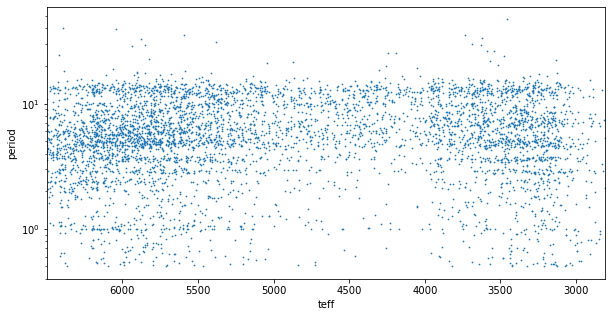

In [23]:
w = list(withteff['TIC'].to_numpy());rp=[];teff=[]
for i in range(len(without_non)):
    wo = without_non['TIC'].iloc[i]
#     print(wo)
    if wo  in w:
        rp.append(without_non['ls-1'].iloc[i])
        teff.append(without_non['Teff'].iloc[i])
    else:
        pass
plt.figure(figsize=(10,5))
plt.scatter(teff,rp,s=.5)
plt.ylabel('period');plt.xlabel('teff')
plt.xlim(max(teff),min(teff));plt.yscale('log');

In [46]:
# test on how to merge
df1 = pd.DataFrame({'id':[1,2,3],'same':[1.1,2.1,3.1],'diff_1':[11,21,31],'sec':[1,1,np.nan]})
df2 = pd.DataFrame({'id':[1,2,5],'same':[1.1,2.1,5.2],'sec':[1,1,5]})

#merge ways
df3 = df1.merge(df2,on=['id','sec'],how='outer') #only keeps matches btwn dfs - not good
df4 = pd.concat([df1,df2]) #appends w/o matching the id:2, it becomes 2 rows - not good
df5 = pd.concat([df1,df2],join='outer')#same as df4
df6 = pd.concat([df1,df2],join='inner')#only keeps id &same columns, drops diffs
# df7 = pd.
df3

,id,same_x,diff_1,sec,same_y
0,1,1.1,11.0,1.0,1.1
1,2,2.1,21.0,1.0,2.1
2,3,3.1,31.0,NaN,NaN
3,5,NaN,NaN,5.0,5.2


In [39]:
# test on how to merge
df1 = pd.DataFrame({'id':[1,2,3,4,5],'same':[1.1,2.1,3.1,4.1,5.1],'diff_1':[11,21,31,41,51],'sec':[1,1,1,1,1]})
df2 = pd.DataFrame({'id':[6,7,8,9,2],'same':[1.2,2.2,3.2,4.2,2.1],'diff_2':[62,72,32,42,52],'sec':[1,np.nan,np.nan,np.nan,1]})



nan

In [44]:
test_1 = features_nogiants[['TIC','Sector','TOTsecs','CLASS','LS_correct']]
test_2 = unseen_nogiants[['TIC','Sector']]
test_3 = test_2.merge(test_1, on=['TIC','Sector'])
# test_3 = pd.concat([test_2,test_1],axis=1)
print('before features/unseen:',len(test_1),len(test_2),'total:',len(test_1) + len(test_2))
print(len(test_3))
test_3

before features/unseen: 292 25920 total: 26212
77


,TIC,Sector,TOTsecs,CLASS,LS_correct
0,15892293,14,NaN,5,NaN
1,15991015,14,NaN,5,NaN
2,15996889,14,NaN,5,NaN
3,16311292,14,NaN,5,NaN
4,16403055,14,NaN,5,NaN
...,...,...,...,...,...
72,202426247,15,NaN,1,NaN
73,219777482,15,NaN,1,NaN
74,224306020,15,NaN,1,NaN
75,230077650,15,NaN,1,NaN
